### Juan José Herrera Aranda
__juanjoha@correo.ugr.es__  
__Aprendizaje Automático__  
__P2__  

Las siguientes tres celdas deben de ser comentadas en caso de que se quiera ejecutar el notebook  en google colab.   
__Importante:__ Las ejecuciones pueden variar los resultados si se ejecutan desde un ordenador local o en google colab

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
#cd '/content/gdrive/My Drive/AA/Practica2'

In [3]:
#ls

Importamos los modulos necesarios

In [4]:
import numpy as np # Calculo numérico
import sympy as sp # Cálculo simbólico
import pandas as pd

import matplotlib.pyplot as plt # Graficar
from matplotlib.colors import ListedColormap
from matplotlib import lines

# Inicializamos semilla
np.random.seed(1)


# Funciones auxiliares

In [5]:
##############################################################################
############################### EJERCICIO 1.1 ################################
##############################################################################

def simula_unif(N, dim, rango):
    return np.random.uniform(rango[0],rango[1],(N,dim))

def simula_gauss(N, dim, sigma):
    media = 0    
    out = np.zeros((N,dim),np.float64)        
    for i in range(N):
        # Para cada columna dim se emplea un sigma determinado. Es decir, para 
        # la primera columna (eje X) se usará una N(0,sqrt(sigma[0])) 
        # y para la segunda (eje Y) N(0,sqrt(sigma[1]))
        out[i,:] = np.random.normal(loc=media, scale=np.sqrt(sigma), size=dim)
    
    return out

##############################################################################
############################### EJERCICIO 1.2 ################################
##############################################################################

def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Calculo de la pendiente.
    b = y1 - a*x1       # Calculo del termino independiente.
    
    return a, b

def signo(x):
    if x >= 0:
        return 1
    return -1

def f(x, y, a, b):
    return signo(y - a*x - b)

def f(x,y):
    return y - a*x - b


def etiquetar(muestra, f, noise = False):
    """
    Función que realiza el etiquetado de una muestra de acuerdo al signo de la función f
    
    Params:
    ----------
        - muestra: np.ndarray,
            Array multidimensional en el que cada elemento es una tupla de coordenadas
        - f:
            función que develve el signo de la distancia de los puntos de la muestra a una 
            recta, la recta se le pasa con los parametros 'a' y 'b'
        - a: int
            pendiente de la recta
        - b: int
            ordenada en el origen de la recta
        - noise: boolean, default=False
            Indica si queremos añadir o no un 10% de ruido
            
    Return:
    ----------
        - etiquetas: np.ndarray
            Etiquetado realizado
    """
    
    # Etiquetamos los ejemplos de la muestra usando la función f
    etiquetas = np.array([signo(f(x[0],x[1])) for x in muestra])
    
    # Si queremos añadir un 10% de ruido a cada etiqueta
    if noise:
        # Tomamos los indices de las muestras que tienen etiquetas 1 y -1
        pos = np.array([i for i, y in enumerate(etiquetas) if y == 1]) 
        neg = np.array([i for i, y in enumerate(etiquetas) if y == -1]) 
        
        # Barajamos aleatoriamente los vectores de indices
        np.random.shuffle(pos)
        np.random.shuffle(neg)
        
        # Calculamos el número de etiquetas que debemos de cambaiar
        npos = int(len(pos)*0.1)
        nneg = int(len(neg)*0.1)
        
        # Cambiamos las etiquetas multiplicando por -1.
        # 1    * (-1)    = -1
        # (-1) * (-1)    =  1
        if len(pos)!=0:
            etiquetas[pos[:npos]]*=(-1)
        if len(neg)!=0:
            etiquetas[neg[:nneg]]*=(-1)
    
    # Devolvemos las etiquetas
    return etiquetas



def precision(muestra,labels,f):
    """
    El error dentro de la meustra es el número de instancias mal clasificadas(signo contrario)
    PRECAUCIÓN: Aunque la función se llame precisión, no es la métrica de precisión que conocemos como accuracy. Esta contabiliza los errores negativos y los divide por el total,
    la otra contabiliza los aciertos buenos y los divide por el total. 
    Params:
    ----------
        - muestra: np.ndarray,
            Matriz con las muestras
        - labels: np.ndarry
            Vector de etiquetas
        - f:
            Función usasda para clasificar
    
    
    Return:
    ----------
        - error: float,
            Ein
    """
    
    error = 0
    for s,t in zip(muestra,labels):
        if signo(f(s[0],s[1])) != t:
            error += 1
    error = error / len(labels)
    
    return error


##############################################################################
################################### PLOTS ####################################
##############################################################################

def plot_labels(muestra, labels, f = f, 
                   title = 'Etiquetas de la muestra separadas por la función f', 
                   rango = [-50,50],
                   axis_labels = ['Eje X','Eje Y'], 
                   colors      = ['purple','orange'],
                   figsize=(7,7),
                   lim = False):
    
    # Instanciamos el marco
    plt.figure(figsize=figsize)
    
    # Etiquetamos los ejes
    plt.xlabel(axis_labels[0])
    plt.ylabel(axis_labels[1])
    
    # Declaramos el mapa de colores para dividir luego en regiones
    colormap = ListedColormap([colors[0],colors[1]])
    
    # Evaluamos la función f, para ello me creo un grid primero y luego evaluo
    xx  = np.linspace(rango[0],rango[1],100)
    yy  = np.linspace(rango[0],rango[1],100)
    X,Y = np.meshgrid(xx,yy)
    Z   = f(X,Y)
    
    # Limitamos los ejes de la salida
    if lim:
        # Calculamos los valores extremos del conjunto de datos
        min_x1= np.min(muestra[:,0])
        max_x1 = np.max(muestra[:,0])
        min_x2= np.min(muestra[:,1])
        max_x2 = np.max(muestra[:,1])

        # Limitamos los ejes
        plt.xlim(min_x1,max_x1)
        plt.ylim(min_x2,max_x2)
    
    # Mostramos la curva de nivel en Z=0 del clasificador (recta)
    plt.contour(X,Y,Z,[0],colors='black') 
    # Colorea las regiones con colores 
    # alpha indica la transparencia
    plt.contourf(X,Y,Z,0,cmap=colormap,alpha=0.4) 

    # Hasta ahora hemos mostrado la recta, y las regiones por colores
    # Ahora ponemos los puntos etiquetados por colores
    
    # Agrupamos las etiquetas en dos grupos
    pos = np.array([a for a,b in zip(muestra,labels) if b == 1])
    neg = np.array([a for a,b in zip(muestra,labels) if b == -1])

    # Visualizamos los datos, poniendo un color diferente a cada clase
    scatter1=plt.scatter(pos[:,0], pos[:,1], c="green",label='Label 1',alpha=0.75)
    scatter2=plt.scatter(neg[:,0], neg[:,1], c="crimson",label='Label -1',alpha=0.75)

    # Creamos un gráfico en 2D que no muestre nada para poder poner leyenda,
    # ya que la leyenda no admite el tipo devuelto por la función contour
    # Codigo sacado de Stackoverflow.com
    line_proxy = lines.Line2D([0],[0], linestyle="none", c='black', marker = '_')
    pos_proxy  = lines.Line2D([0],[0], linestyle="none", c='orange', marker = 's')
    neg_proxy  = lines.Line2D([0],[0], linestyle="none", c='purple', marker = 's')
    
    plt.legend([scatter1,scatter2,line_proxy, pos_proxy, neg_proxy], ['Label 1','Label -1', 
            "f(x,y)=0","f(x,y)>0","f(x,y)<0"], numpoints = 1,framealpha=0.25)
    plt.title(title)
    plt.show()
    
    
    
def plot_plain_3D(w,f,X,y,title,axis_labels,legend_labels,zlim,view,using_w = True):
    '''
    Función que visualiza en un espacio los puntos usados en el entrenamiento junto 
    con el plano generado generado por los pesos tras la regresión lineal.
    
    Nota: Función pensada para el ejercicio 2, aunque se puede generalizar 
    
    @Params:
        - w: vector de pesos
        - f: función que clasifica (gráfica)
        - x: Datos de entrenamienacco  [1,X_1,X_2]
        - y: etiquetas
        - title: título del plot
        - axis_labels: etiquetas de los ejes
        - legend_labels: etiquetas de la leyenda
        - using_w: boolean, default = True
            Especifica si la superficie la vamos crear a partir de los w
            o a partir de la gráfica f (parámetro f)
        
    '''
    # Creamos la figura y los ejes
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111,projection='3d')
    
    # Pintamos los datos, para ello
    # identificamos las coordenadas según la clase
    # pintamos los puntos de dicha clase de un color
    for j,c in enumerate(np.unique(y)):
        
        ax_x = [x[1] for i,x in enumerate(X) if y[i] == c] # eje x
        ax_y = [x[2] for i,x in enumerate(X) if y[i] == c] # eje y 
        
        ax.scatter(ax_x,ax_y,c,color=['darkorchid','black'][j],alpha=0.8)
        
    
    # etiquetamos los ejes
    ax.set_xlabel(axis_labels[0])
    ax.set_ylabel(axis_labels[1])
    ax.set_zlabel(axis_labels[2])
    
    # Determinamos los extremos de los valores para luego construir un grid con las proporciones adecaudas
    min_int = np.min(X[:,1])
    max_int = np.max(X[:,1])
    min_sim = np.min(X[:,2])
    max_sim = np.max(X[:,2])
    
    # Declaramos un grid de puntos equiespaciados para evaluar la función
    xx = np.linspace(min_int,max_int,50)
    yy = np.linspace(min_sim,max_sim,50)
    xx, yy = np.meshgrid(xx,yy)
    
    # Evaluamos en los puntos de la malla la función lineal obtenida 
    if using_w:
        z = np.array(w[0]+xx*w[1]+yy*w[2])
    else:
        z = np.array(f(xx,yy))
    # Visualizamos el hiperplano 
    ax.plot_surface(xx,yy, z, color='aqua',alpha=0.6)
    #ax.set_zlim(zlim)
    
    # Creamos un gráfico en 2D que no muestre nada para poder poner leyenda,
    # debido a que la leyenda no admite el tipo devuelto por un scatter 3D,
    # https://stackoverflow.com/questions/20505105/add-a-legend-in-a-3d-scatterplot-with-scatter-in-matplotlib
    scatter_proxy1 = lines.Line2D([0],[0], linestyle="none", c='black', marker = 'o')
    scatter_proxy2 = lines.Line2D([0],[0], linestyle="none", c='darkorchid', marker = 'o')
    plane_proxy = lines.Line2D([0],[0], linestyle="none", c='aqua', marker = '_')
    ax.legend([scatter_proxy1,scatter_proxy2, plane_proxy], legend_labels, numpoints = 1, loc='upper left')
    
    #Cambiamos la posición del gráfico para que se vean mejor los datos y el hiperplano
    #https://stackoverflow.com/questions/12904912/how-to-set-camera-position-for-3d-plots-using-python-matplotlib
    ax.view_init(view[0],view[1]) 
    
    plt.title(title)
    plt.show()

# Ejc1: Complejidad de H y ruido

## 1.1)

Text(0, 0.5, 'Eje Y')

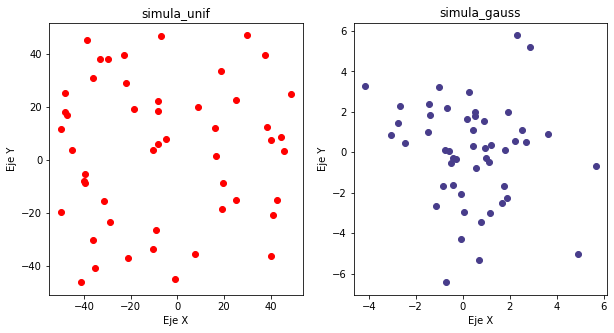

In [6]:
# Declaramos variables
N     = 50
dim   = 2
rango = [-50,50]
sigma = [5,7]

# Llamamos a las funciones que nos pide el enunciado para obtener los puntos
unif  = simula_unif (N,dim,rango)
gauss = simula_gauss(N,dim,sigma) 

# Creamos un marco y los ejes
fig, ax = plt.subplots(1,2 ,sharey = False, figsize=(10,5))

# Primera figura - unif
ax[0].scatter(x = unif[:,0],y = unif[:,1], color = 'red')
ax[0].set_title('simula_unif', loc='center')
ax[0].set_xlabel('Eje X')
ax[0].set_ylabel('Eje Y')

# Segunda figura - gauss
ax[1].scatter(x = gauss[:,0],y = gauss[:,1], color = 'darkslateblue')
ax[1].set_title('simula_gauss', loc='center')
ax[1].set_xlabel('Eje X')
ax[1].set_ylabel('Eje Y')


## 1.2) 

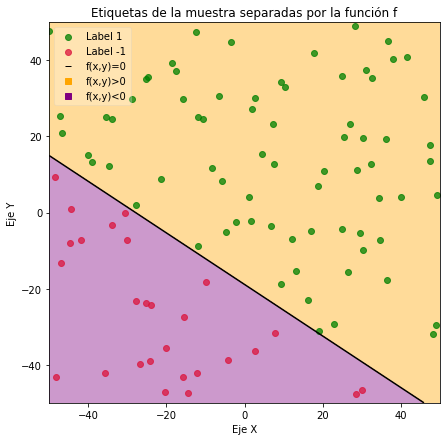

Error:  0.0
pendiente:  -0.6771584922002485
ordenada en el origen:  -18.89022818933684


In [7]:
# Declaramos variables
N     = 100
dim   = 2
rango = [-50,50]

# Generamos una muestra de puntos 2D
muestra = simula_unif(N,dim,rango)

# Simulamos una recta en un rango determinado y obtenemos la pendiente y la ordenada en el origen
a, b = simula_recta(rango)

# Usamos la recta anterior para etiquetar a los puntos de la muestra
labels = etiquetar(muestra, f, noise = False)

# Mostramos los puntos de la muestra coloreados por etiquetas y separador por el clasificador
plot_labels(muestra,labels,f)
print("Error: ",precision(muestra,labels,f))
print("pendiente: ",a)
print("ordenada en el origen: ",b)

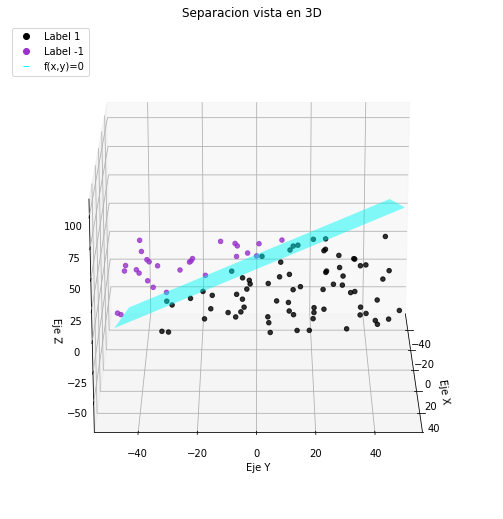

In [8]:
X = np.array([[1,x[0],x[1]] for x in muestra])
plot_plain_3D(w             = None,
              f             = f,
              X             = X,
              y             = labels,
              title         = 'Separacion vista en 3D',
              axis_labels   = ['Eje X','Eje Y','Eje Z'],
              legend_labels = ['Label 1','Label -1','f(x,y)=0'],
              zlim          = [-3,3],
              view          = [20,0],
              using_w       = False)

Ahora metemos un 10% de ruido a la muestra, para ello vamos a poner a True el argumento noise de la función etiquetar, la cual se encarga de hacerlo.

Error:  0.09


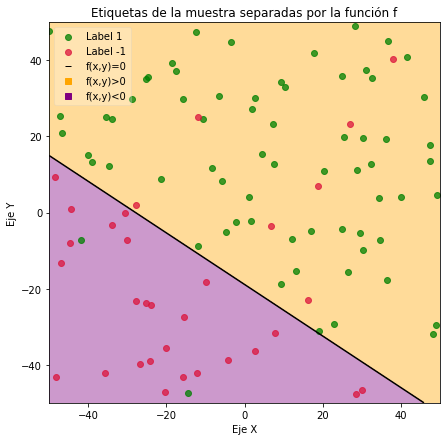

In [9]:
# Usamos la recta anterior para etiquetar a los puntos de la muestra
labels_noise = etiquetar(muestra, f, noise = True)
print("Error: ",precision(muestra,labels_noise,f))
# Mostramos los puntos de la muestra coloreados por etiquetas y separador por el clasificador
plot_labels(muestra,labels_noise,f)

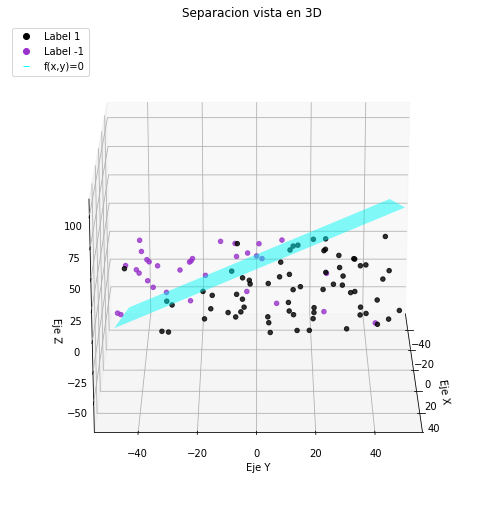

In [10]:
X = np.array([[1,x[0],x[1]] for x in muestra])
plot_plain_3D(w             = None,
              f             = f,
              X             = X,
              y             = labels_noise,
              title         = 'Separacion vista en 3D',
              axis_labels   = ['Eje X','Eje Y','Eje Z'],
              legend_labels = ['Label 1','Label -1','f(x,y)=0'],
              zlim          = [-3,3],
              view          = [20,0],
              using_w       = False)

Ahora vamos a suponer que son otras funciones las que definen la frontera de clasificación de los puntos de la muestra en lugar de una recta.

Funcion h1


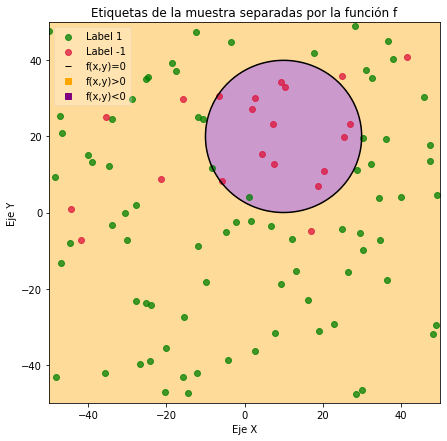

Error:  0.09


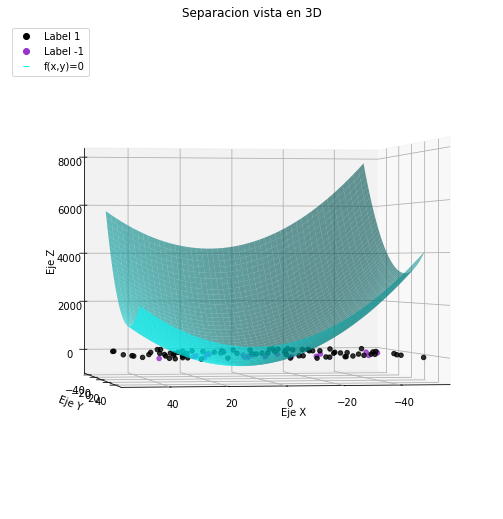

Funcion h2


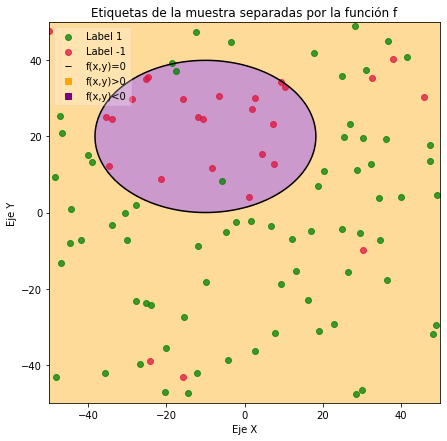

Error:  0.09


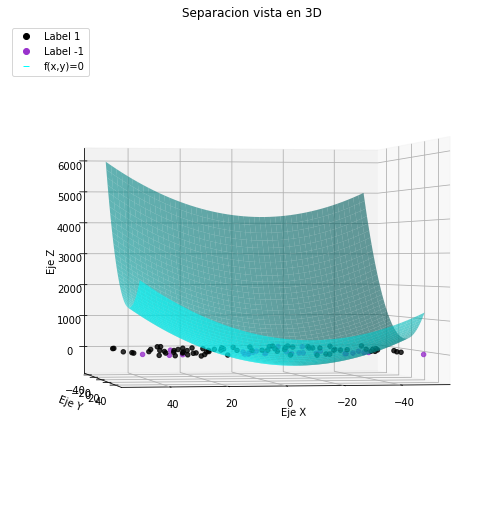

Funcion h3


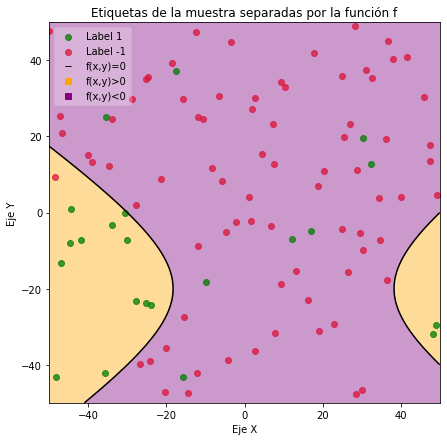

Error:  0.09


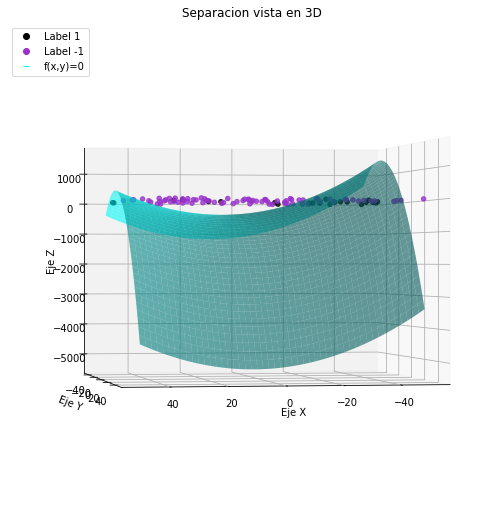

Funcion h4


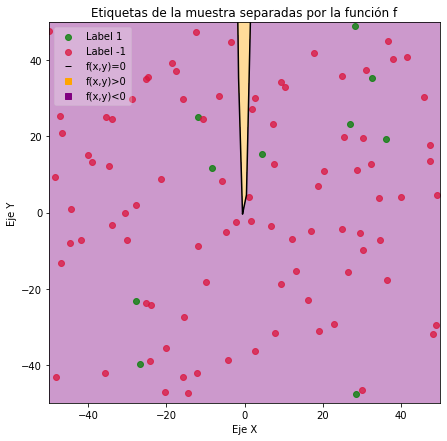

Error:  0.1


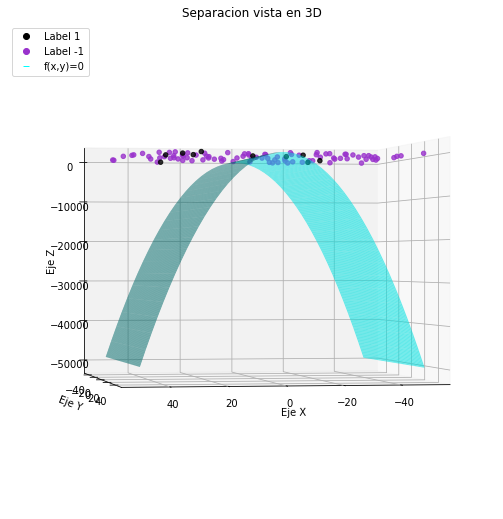

In [11]:
# Se definen dichas funciones
def h1(x,y):
    return     (x - 10)**2 + (y - 20)**2 - 400
def h2(x,y):
    return 0.5*(x + 10)**2 + (y - 20)**2 - 400
def h3(x,y):
    return 0.5*(x - 10)**2 - (y + 20)**2 - 400
def h4(x,y):
    return y - 20*x**2 - 5*x + 3

# Guardamos las funciones en un vetor
vf = [h1,h2,h3,h4]
vf_str = ['h1','h2','h3','h4']

for i,h in enumerate(vf):
    print(f'Funcion {vf_str[i]}')
    
    # Usamos la función para etiquetar la muestra
    labels_noise2 = etiquetar(muestra, h, noise = True)
    
    # Mostramos los puntos de la muestra coloreados por etiquetas y separador por el clasificador
    plot_labels(muestra,labels_noise2,h)
    X = np.array([[1,x[0],x[1]] for x in muestra])
    print("Error: ",precision(muestra,labels_noise2,h))
    plot_plain_3D(w             = None,
              f             = h,
              X             = X,
              y             = labels_noise2,
              title         = 'Separacion vista en 3D',
              axis_labels   = ['Eje X','Eje Y','Eje Z'],
              legend_labels = ['Label 1','Label -1','f(x,y)=0'],
              zlim          = [-3,3],
              view          = [0,80],
              using_w       = False)

Sea $vf = \{f,h_1,h_2,h_3,h_4\}$ un conjunto de funciones. Vamos a fijar una de ellas $vf_i$ y vamos a ver para cada $j = 1,2,3,4,5$ el error que comete al clasificar $vf_j$ usando las etiquetas de $vf_i$ para $i = 1,2,3,4,5$

Funcion f


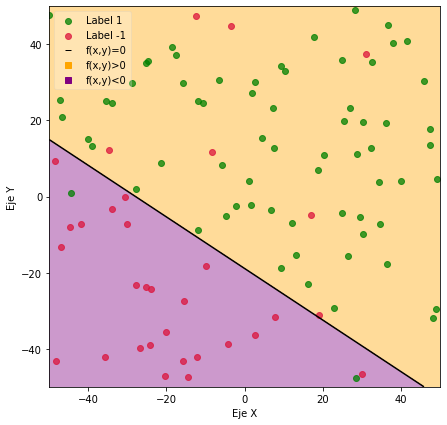

Error:  0.09


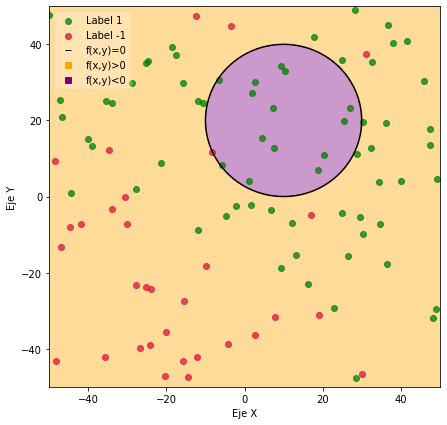

Error:  0.46


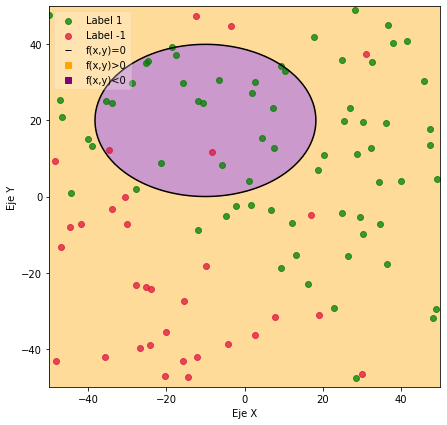

Error:  0.5


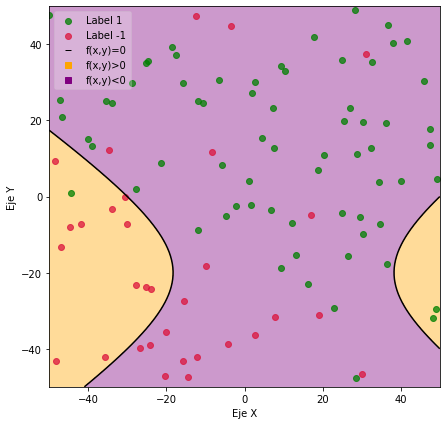

Error:  0.77


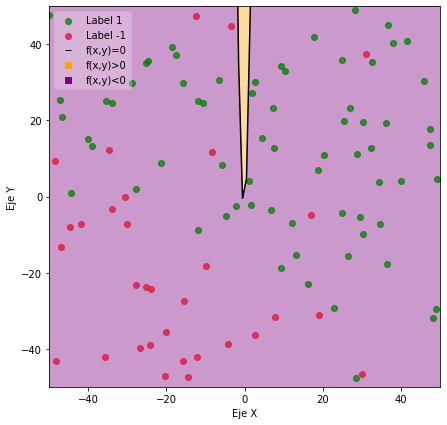

Error:  0.68
Funcion h1


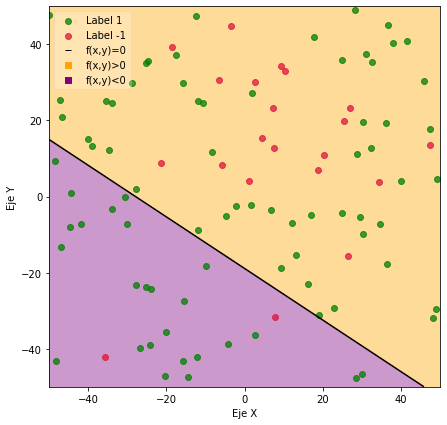

Error:  0.44


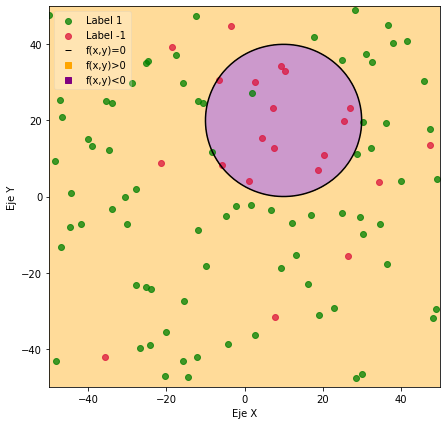

Error:  0.09


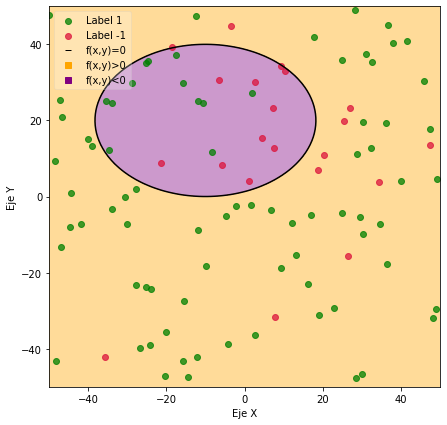

Error:  0.23


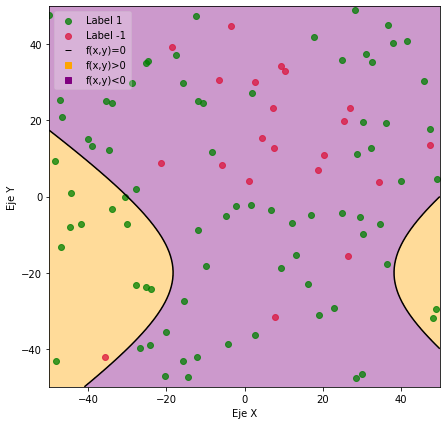

Error:  0.66


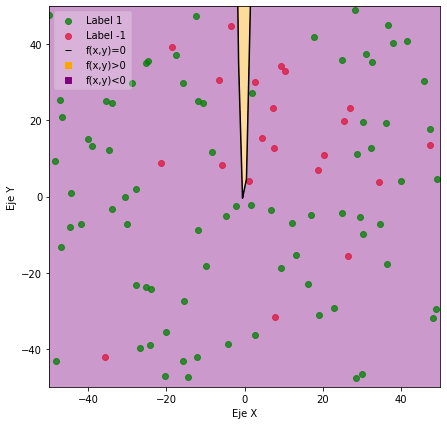

Error:  0.79
Funcion h2


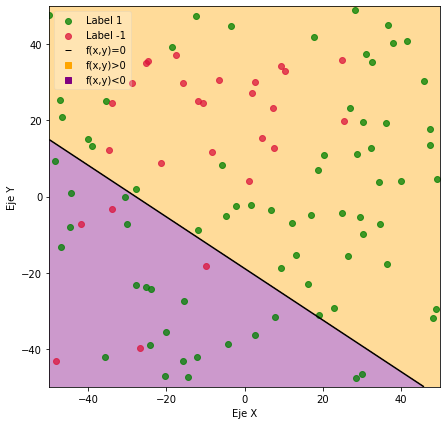

Error:  0.44


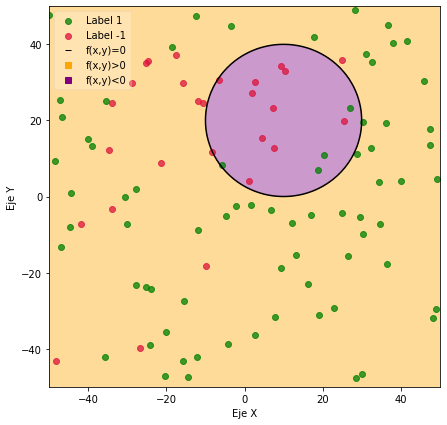

Error:  0.21


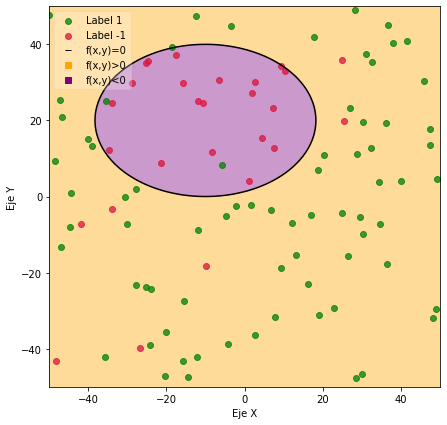

Error:  0.09


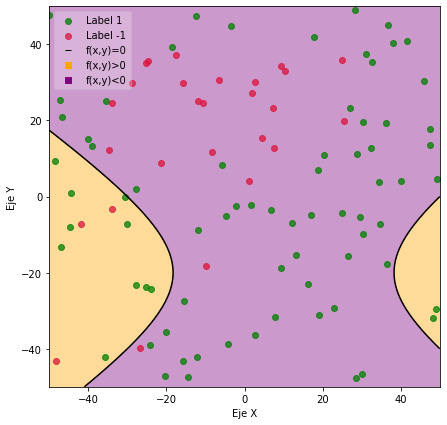

Error:  0.64


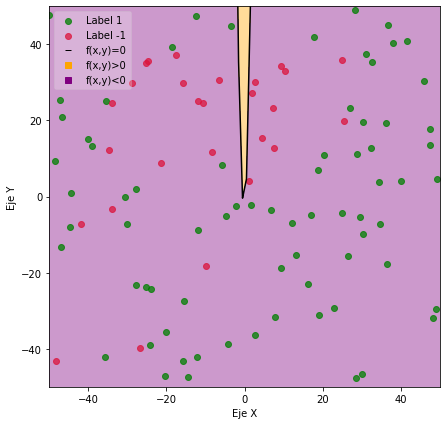

Error:  0.73
Funcion h3


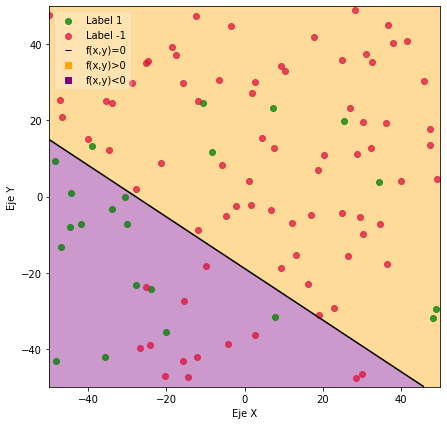

Error:  0.79


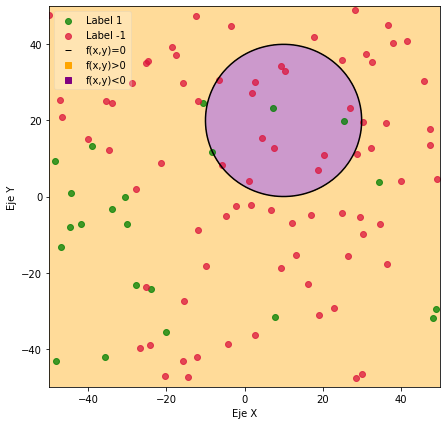

Error:  0.68


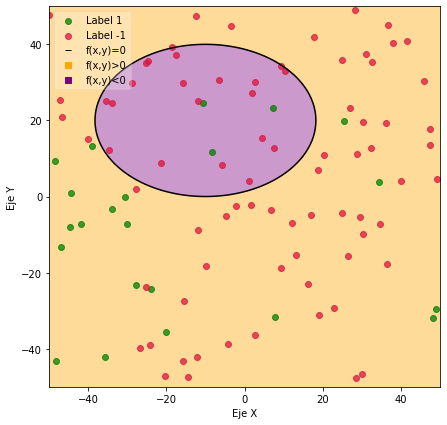

Error:  0.62


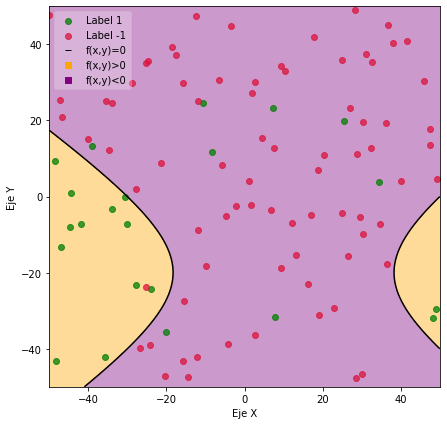

Error:  0.09


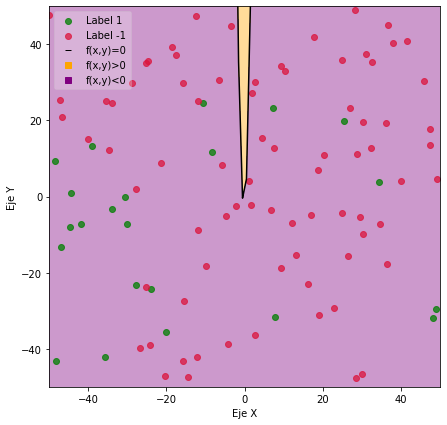

Error:  0.22
Funcion h4


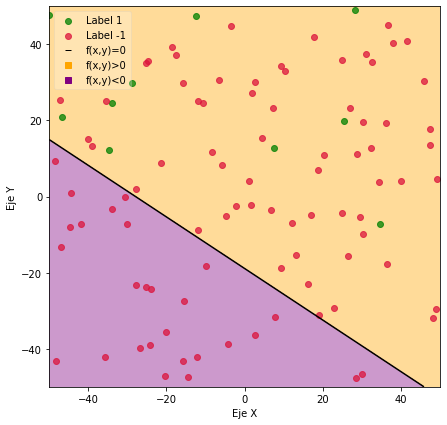

Error:  0.63


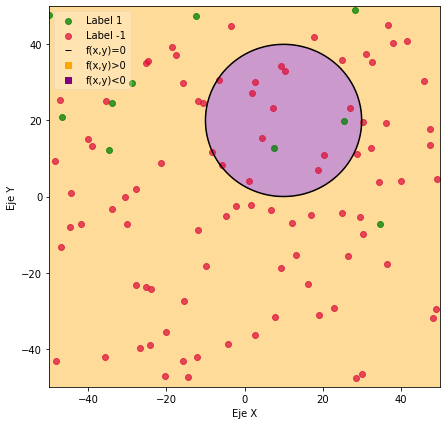

Error:  0.8


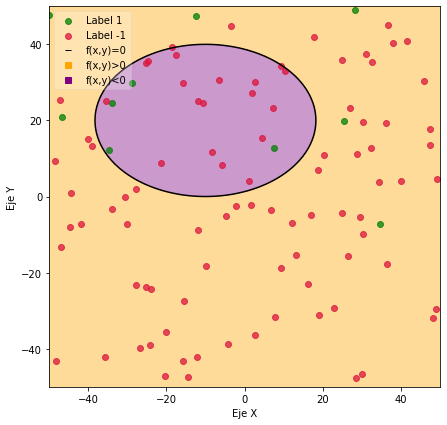

Error:  0.76


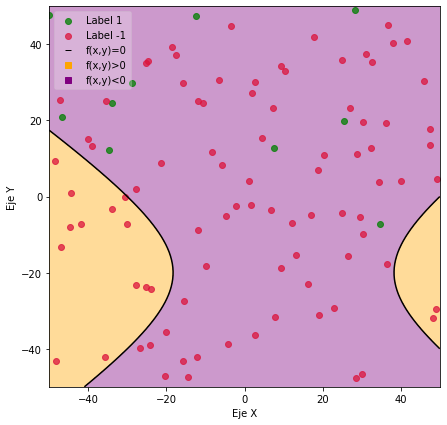

Error:  0.25


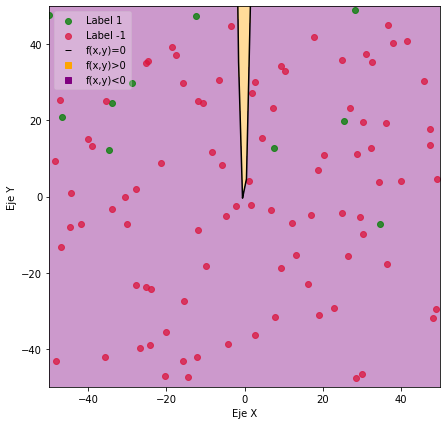

Error:  0.1


In [12]:
# Guardamos las funciones en un vetor
vf = [f,h1,h2,h3,h4]
vf_str = ['f','h1','h2','h3','h4']

dic = {'f':[],'h1':[],'h2':[],'h3':[],'h4':[]}

for i,h in enumerate(vf):
    print(f'Funcion {vf_str[i]}')
    
    # Etiqueto con la función h
    labels_noise2 = etiquetar(muestra, h, noise = True)
    
    # Para el resto de funciones
    for j,g in enumerate(vf):
        # Muestro la clasificación que hace 'g' usando el etiquetado de 'h'
        plot_labels(muestra,labels_noise2,g,title="")
        
        acc = precision(muestra,labels_noise2,g)
        
        dic[vf_str[i]].append(acc)
        
        print("Error: ",acc)
        """
        X = np.array([[1,x[0],x[1]] for x in muestra])
        plot_plain_3D(w             = None,
                  f             = g,
                  X             = X,
                  y             = labels_noise2,
                  title         = 'Separacion vista en 3D',
                  axis_labels   = ['Eje X','Eje Y','Eje Z'],
                  legend_labels = ['Label 1','Label -1','f(x,y)=0'],
                  zlim          = [-3,3],
                  view          = [5,0],
                  using_w       = False)
        """

In [13]:
df = pd.DataFrame(dic,index = vf_str)
#df.to_csv('comp_all_funciones.csv')
df

f    h1    h2    h3    h4
f   0.09  0.44  0.44  0.79  0.63
h1  0.46  0.09  0.21  0.68  0.80
h2  0.50  0.23  0.09  0.62  0.76
h3  0.77  0.66  0.64  0.09  0.25
h4  0.68  0.79  0.73  0.22  0.10

# Ejc2: Modelos Lineales

## Funciones axuliares

In [14]:
def ajusta_PLA(datos,labels,max_iter,vini):
    """
    Función que calcula el hiperplano solución a un problema de clasificación binaria
    usando el algoritmo PLA
    
    Parameters:
    ----------
        - datos: matriz,
            Muestra, cada item representa una fila
        - labels: array/lista,
            etiquetas
        - max_iter: int
            Número máximo de épocas que se van a realizar
        - vini: array/lista
            - Vector con los pesos iniciales 
    
    
    Return:
    ----------
        - w: array/lista
            Vector con los pesos del hiperplano
        - it: int
            Numero de épocas realizadas por el algoritmo
    """
    
    
    it      = 0             # Indicador de las iteraciones (epocas)
    w       = vini.copy()   # Pesos iniciales
    changes = True          # Boolean que indica si hay o no cambio en una época
    
    # Mientras haya cambios y no superemos el máximo de iteraciones
    while changes and it < max_iter:
        # Empezamos sin ningún cambio 
        changes = False
        # Iteramos en la muestra y etiquetas
        for x,y in zip(datos,labels):
            # Si el signo de la operacion no coincide con la etiqueta
            if signo(np.dot(w.T,x)) != y:
                # Actualizamos los pesos
                w = w + y*x
                # Indicamos que ha habido cambio
                changes = True
                
        # Aumentamos en una unidad el número de épocas
        it += 1
    
    return w,it


def error_PLA(muestra,labels,f):
    """
    Función que calcula Ein para el algoritmo del perceptron
    El error dentro de la meustra es el número de instancias mal clasificadas(signo contrario)
    
    Params:
    ----------
        - muestra: np.ndarray,
            Matriz con las muestras
        - labels: np.ndarry
            Vector de etiquetas
        - f:
            Función usasda para clasificar
    
    
    Return:
    ----------
        - error: float,
            Ein
    """
    
    error = 0
    for s,t in zip(muestra,labels):
        if signo(f(s[1],s[2])) != t:
            error += 1
    error = error / len(labels)
    
    return error


def f(x,y):
    return y - a*x - b

## Perceptrón

Vamos a ejecutar el PLA con los datos empleados en el apartado 1.2a.  
Inicializamos el algoritmo con:    
- El vector cero  
- Vectores de números aleatorios en $[0,1]$ (10 veces)  


Empezamos ejecutando PLA con el vector de pesos iniciales igual a cero

### A)

Numero de epocas realizadas: 75
Vector inicial de pesos: [0 0 0]
Pesos:  [661.          23.20241712  32.39163606]
Hiperplano obtenido:  y = -0.7163088976709121x + -20.406502428319463
Error: 0.0


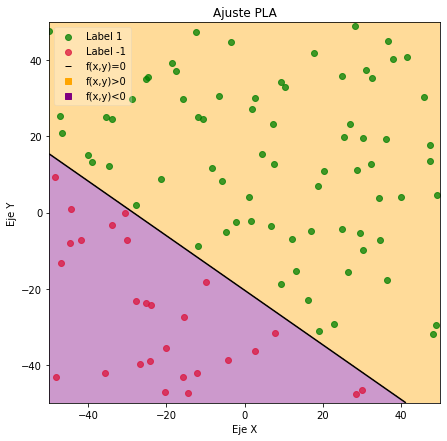

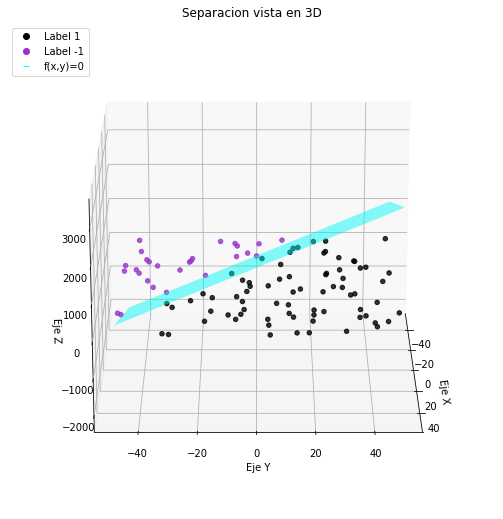

In [15]:
# Ajustamos los parámeros del algoritmo
max_iter = 1000
vini     = np.array([0,0,0])


# Añadimos una caracterítica más a los datos para poder hacer el producto escalar
datos = np.array([[1,x[0],x[1]] for x in muestra])
# Usamos la recta anterior para etiquetar a los puntos de la muestra
labels = etiquetar(muestra, f, noise = False)


# Ejecutamos el PLA
w, it = ajusta_PLA(datos,labels,max_iter,vini)

# Imprimimos resultados
print(f"Numero de epocas realizadas: {it}")
print(f"Vector inicial de pesos: {vini}")
print(f"Pesos:  {w}")
print(f"Hiperplano obtenido:  y = {-w[1]/w[2]}x + {-w[0]/w[2]}")
print(f"Error: {error_PLA(datos,labels,lambda x,y:w[0] + w[1]*x + w[2]*y)}")

# Visualizamos resultados
plot_labels(datos[:,1:], labels, lambda x,y:w[0] + w[1]*x + w[2]*y, title = 'Ajuste PLA')



plot_plain_3D(w             = w,
              f             = None,
              X             = datos,
              y             = labels,
              title         = 'Separacion vista en 3D',
              axis_labels   = ['Eje X','Eje Y','Eje Z'],
              legend_labels = ['Label 1','Label -1','f(x,y)=0'],
              zlim          = [-3,3],
              view          = [20,0],
              using_w       = True)

En este aparado los datos son linealmente separables, por lo que no vamos a mostrar gráficas ya que con el número suficiente de épocas todos van a converger.

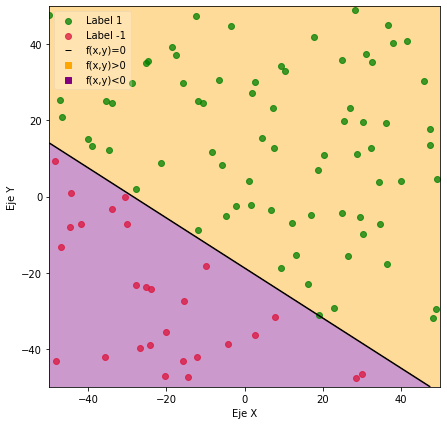

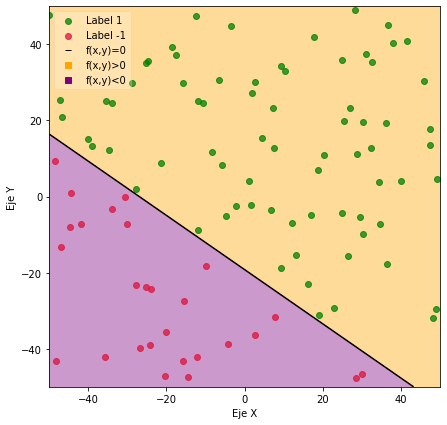

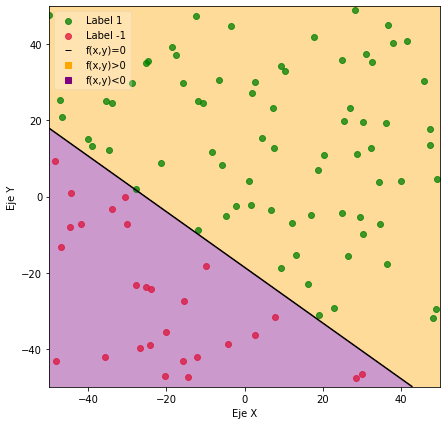

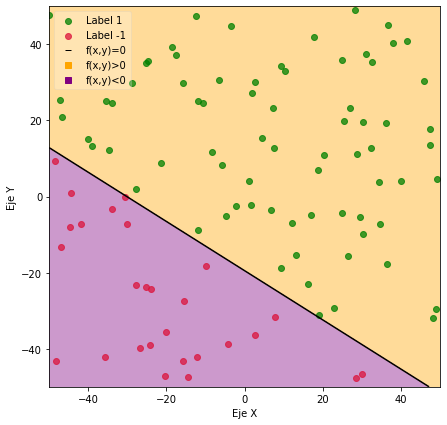

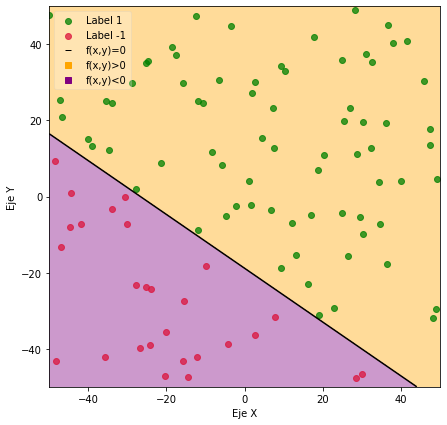

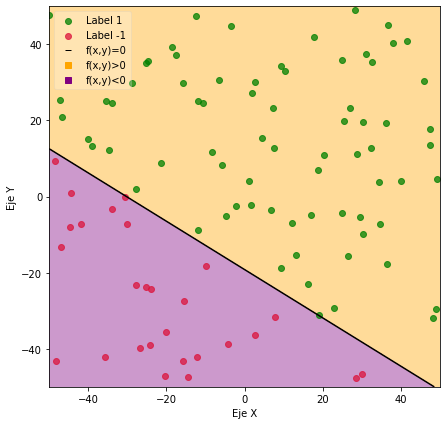

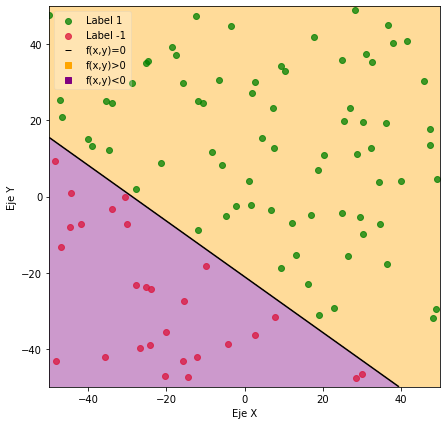

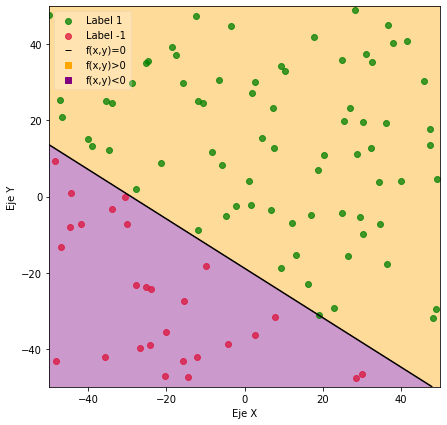

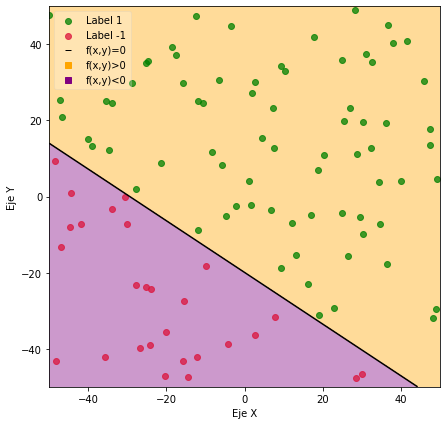

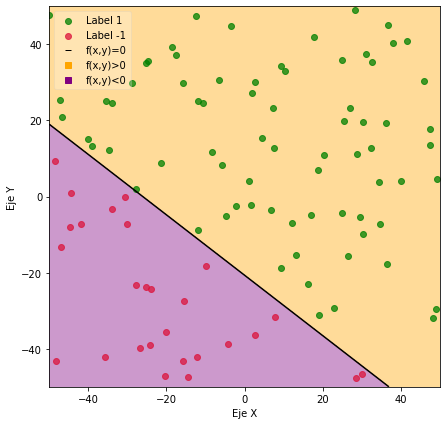

vini  \
0  [0.7530706558694549, 0.8061631629534083, 0.751...   
1  [0.0800609772712173, 0.48169628302117706, 0.44...   
2  [0.6724726505249299, 0.4487372588243219, 0.704...   
3  [0.6816453376026229, 0.6971485287527562, 0.618...   
4  [0.15098073327964578, 0.760802456305756, 0.781...   
5  [0.9041029859138049, 0.23376869260410593, 0.17...   
6  [0.3910991231067624, 0.3205646539951602, 0.815...   
7  [0.6135258996684316, 0.7600017523497489, 0.427...   
8  [0.09944056291558923, 0.11503501205024624, 0.3...   
9  [0.19384776750950716, 0.8207464986229382, 0.59...   

                                                fini   it  error  
0  [1107.7530706558696, 38.7843041209022, 59.0237...  257    0.0  
1  [1050.0800609772712, 38.9650968209379, 54.7271...  226    0.0  
2  [1070.672472650525, 42.0696918942441, 57.58311...  235    0.0  
3  [464.6816453376026, 15.421785190264586, 23.867...   43    0.0  
4  [1044.1509807332795, 39.17684921573476, 55.441...  214    0.0  
5  [594.9041029859138, 19.685752821475134, 31.017...   69    0.0  
6  [659.3910991231068, 22.9034232676819, 31.30453...   71    0.0  
7  [1142.6135258996685, 39.33023887205248, 60.640...  276    0.0  
8  [701.0994405629156, 23.866766783856505, 35.173...   79    0.0  
9  [944.1938477675095, 36.25258572486675, 45.6907...  163    0.0

In [16]:
# Ajustamos los parámeros del algoritmo
max_iter = 1000
N = 10

# Añadimos una caracterítica más a los datos para poder hacer el producto escalar
datos = np.array([[1,x[0],x[1]] for x in muestra])

# Usamos la recta anterior para etiquetar a los puntos de la muestra
labels = etiquetar(muestra, f, noise = False)

buffer = {'vini':[],'fini':[],'it':[],'error':[]}
for i in range(N):
    
    # Inicializamos el vector de pesos con numeros aleatorios entre 0 y 1
    # La dimensión del vector debe de ser 3 (datos.shape --> (100,3))
    vini     = np.random.rand(datos.shape[1])

    # Ejecutamos el PLA
    w, it = ajusta_PLA(datos,labels,max_iter,vini)
    
    # Calculamos el error
    error = error_PLA(datos, labels, f = lambda x,y: w[0] + x*w[1] + y*w[2])
    
    # Guardamos los resultados de la ejecución
    buffer['vini'].append(vini)
    buffer['fini'].append(w)
    buffer['it'].append(it)
    buffer['error'].append(error)
    
    
    plot_labels(muestra,labels,lambda x,y: w[0] + x*w[1] + y*w[2],title="")
    

df = pd.DataFrame(buffer)
df.round(decimals=5)
#df.to_csv('rest_2a.csv')
df


### B)

Ahora vamos a usar los datos del ejercicio 1.2b a los cuales se le añadieron ruido, por lo que ahora los datos no son separables y tiene algo más de sentido mostrar sus respectivas gráficas. La estructura de datos que guara las etiquetas del ejercicio 1.2b se llama __labels_noise__

Realizamos el mismo experimento que antes, primero ejecutamos con el vector de pesos iniciales igual a cero
y después ejecutamos 10 veces con pesos aleatorios entre $[0,1]$. Como los datos no son separables, el algoritmo está continuamente ciclando, vamos a ejecutarlo varias veces con distitnas epocas

Numero de epocas realizadas: 500
Vector inicial de pesos: [0 0 0]
Pesos:  [398.           7.20432464  37.42302505]
Hiperplano obtenido:  y = -0.19251048335187554x + -10.63516376658063
Error: 0.2


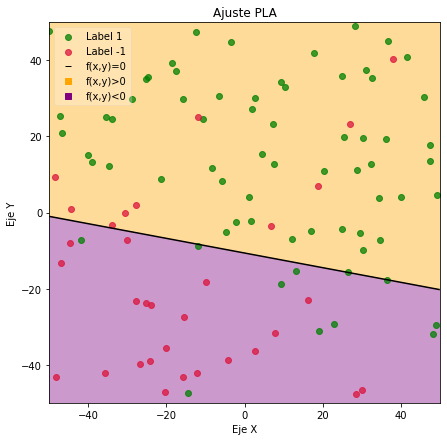

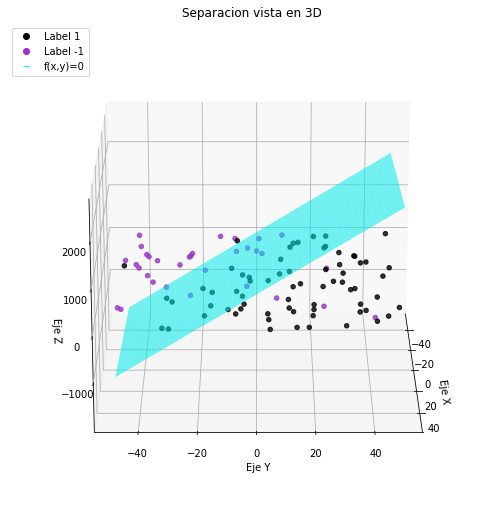

Numero de epocas realizadas: 1000
Vector inicial de pesos: [0 0 0]
Pesos:  [401.          10.74901309  43.0004134 ]
Hiperplano obtenido:  y = -0.24997464533641475x + -9.32549174099509
Error: 0.17


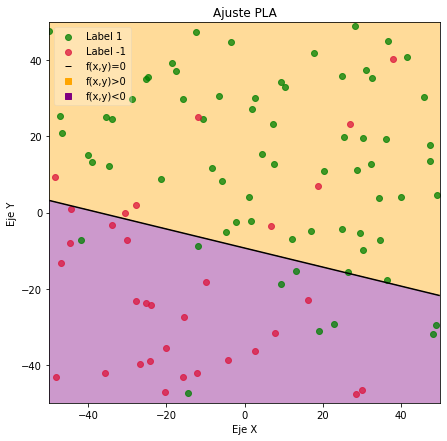

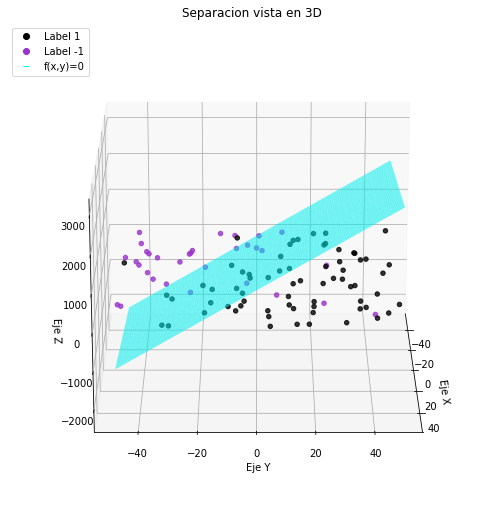

Numero de epocas realizadas: 5000
Vector inicial de pesos: [0 0 0]
Pesos:  [389.           3.32369313  24.38904183]
Hiperplano obtenido:  y = -0.13627813483496257x + -15.949786085139937
Error: 0.18


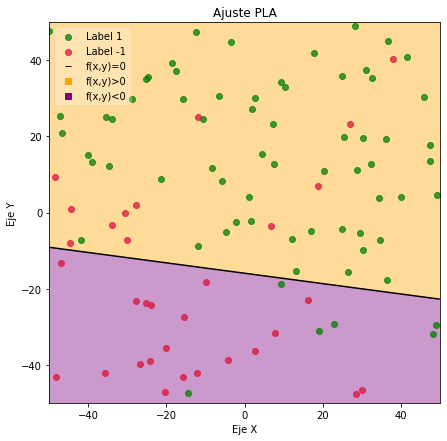

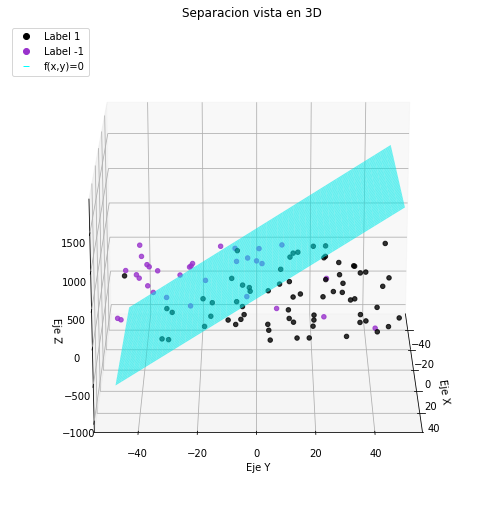

Numero de epocas realizadas: 7000
Vector inicial de pesos: [0 0 0]
Pesos:  [399.          12.21608818  21.76478715]
Hiperplano obtenido:  y = -0.5612776312777921x + -18.33236398359592
Error: 0.12


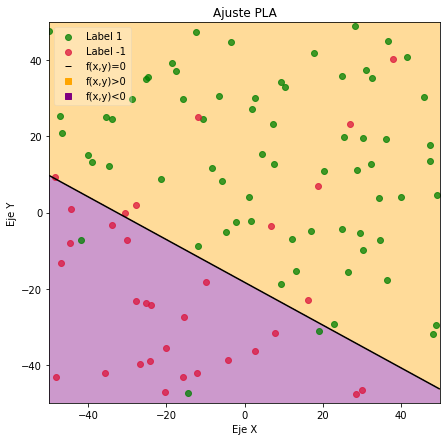

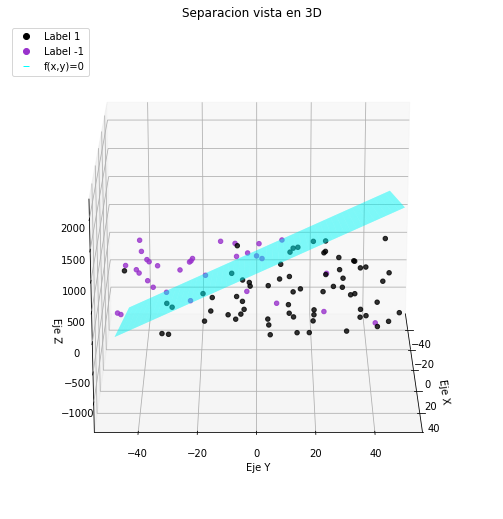

Numero de epocas realizadas: 10000
Vector inicial de pesos: [0 0 0]
Pesos:  [381.          15.95213363  45.996241  ]
Hiperplano obtenido:  y = -0.3468138544911186x + -8.283285583590988
Error: 0.16


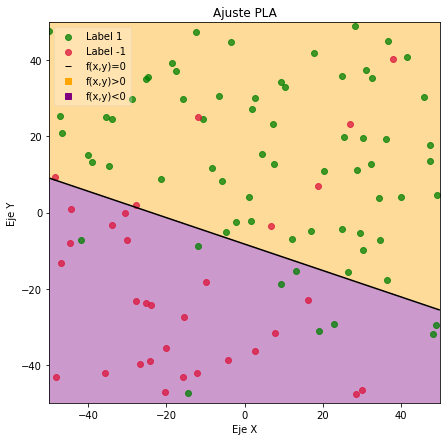

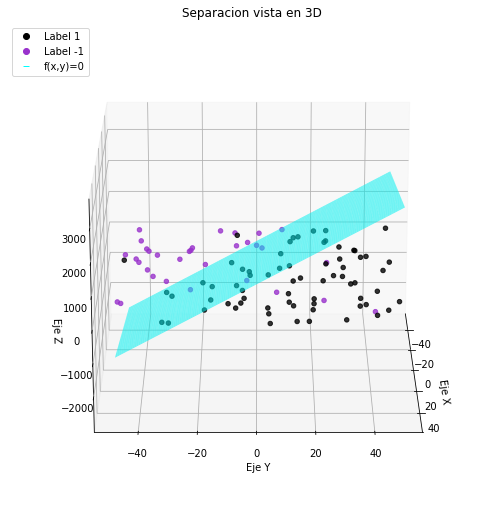

In [17]:
# Ajustamos los parámeros del algoritmo
max_iter = [500,1000,5000,7000,10000]
vini     = np.array([0,0,0])



# Añadimos una caracterítica más a los datos para poder hacer el producto escalar
datos = np.array([[1,x[0],x[1]] for x in muestra])
# Usamos la recta anterior para etiquetar a los puntos de la muestra
#labels = etiquetar(muestra, f, noise = False)

buffer = {'vini':[],'fini':[],'it':[],'error':[]}

for it in max_iter:
    # Ejecutamos el PLA
    w, it = ajusta_PLA(datos,labels_noise,it,vini)

    error = error_PLA(datos, labels_noise, f = lambda x,y: w[0] + x*w[1] + y*w[2])
    
    buffer['vini'].append(vini)
    buffer['fini'].append(w)
    buffer['it'].append(it)
    buffer['error'].append(error)

    
    # Imprimimos resultados
    print(f"Numero de epocas realizadas: {it}")
    print(f"Vector inicial de pesos: {vini}")
    print(f"Pesos:  {w}")
    print(f"Hiperplano obtenido:  y = {-w[1]/w[2]}x + {-w[0]/w[2]}")
    print(f"Error: {error_PLA(datos,labels_noise,lambda x,y:w[0] + w[1]*x + w[2]*y)}")

    # Visualizamos resultados
    plot_labels(datos[:,1:], labels_noise, lambda x,y:w[0] + w[1]*x + w[2]*y, title = 'Ajuste PLA')
    plot_plain_3D(w             = w,
                  f             = None,
                  X             = datos,
                  y             = labels_noise,
                  title         = 'Separacion vista en 3D',
                  axis_labels   = ['Eje X','Eje Y','Eje Z'],
                  legend_labels = ['Label 1','Label -1','f(x,y)=0'],
                  zlim          = [-3,3],
                  view          = [20,0],
                  using_w       = True)
    



In [18]:
df = pd.DataFrame(buffer)
#df.to_csv('reslt_2_1_b.csv')
df

vini                                             fini     it  error
0  [0, 0, 0]    [398.0, 7.204324640003236, 37.42302504552435]    500   0.20
1  [0, 0, 0]    [401.0, 10.7490130884193, 43.000413397740104]   1000   0.17
2  [0, 0, 0]    [389.0, 3.323693130918585, 24.38904182937116]   5000   0.18
3  [0, 0, 0]  [399.0, 12.216088175002021, 21.764787146765762]   7000   0.12
4  [0, 0, 0]   [381.0, 15.952133634372686, 45.99624100305715]  10000   0.16

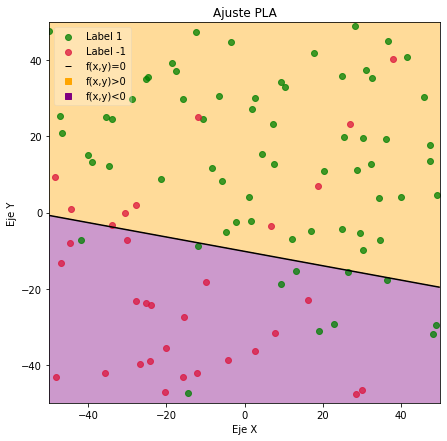

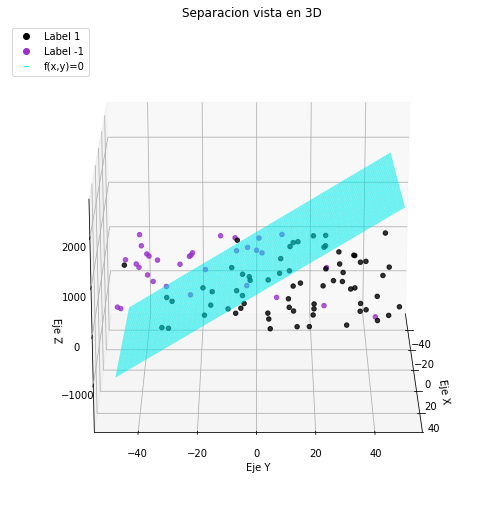

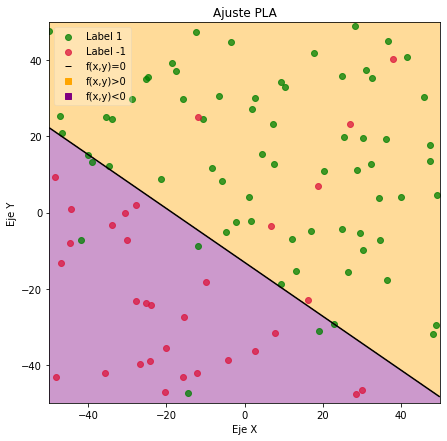

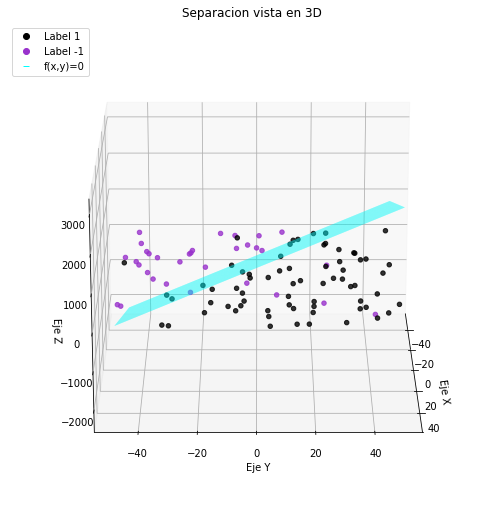

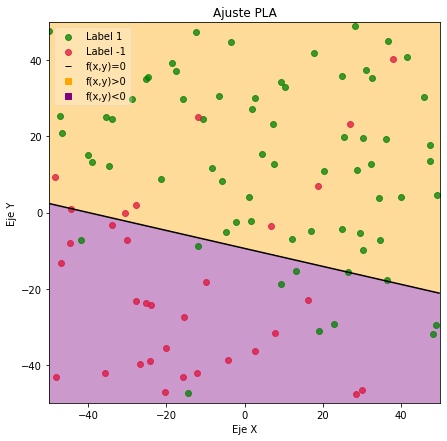

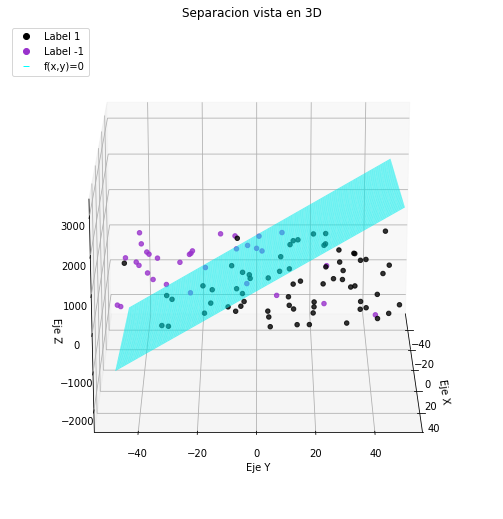

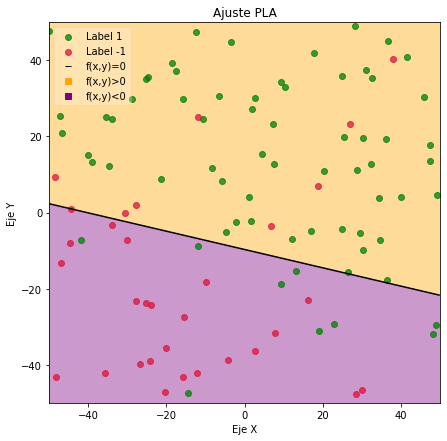

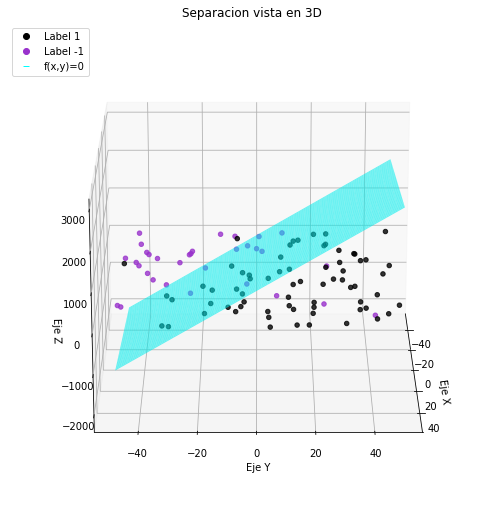

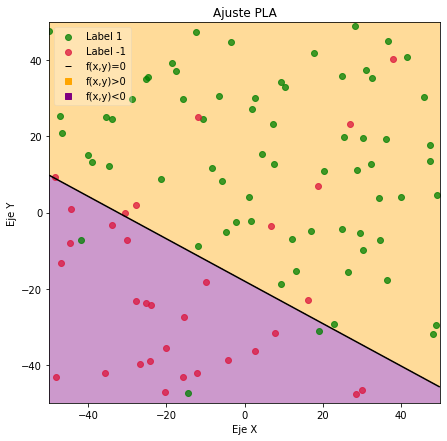

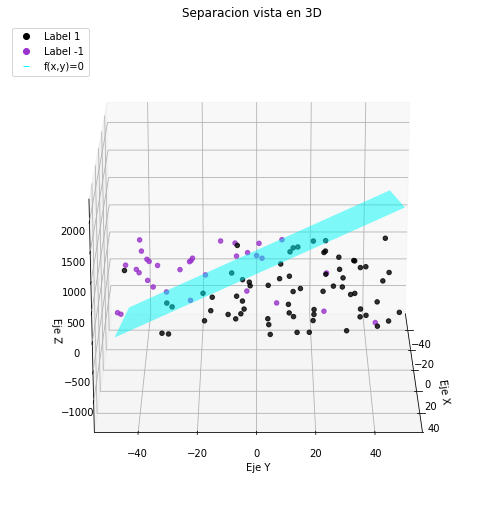

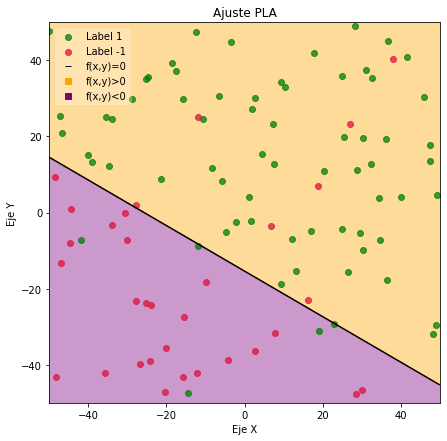

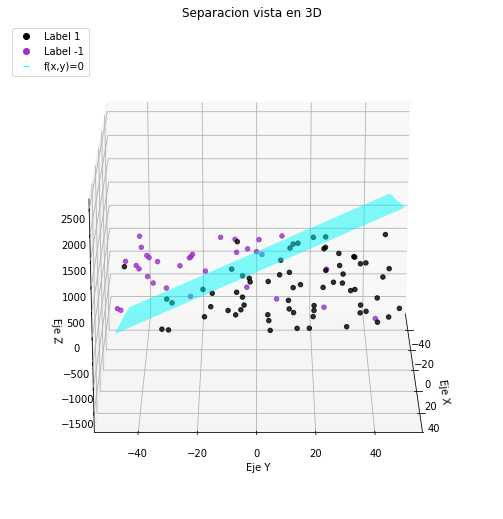

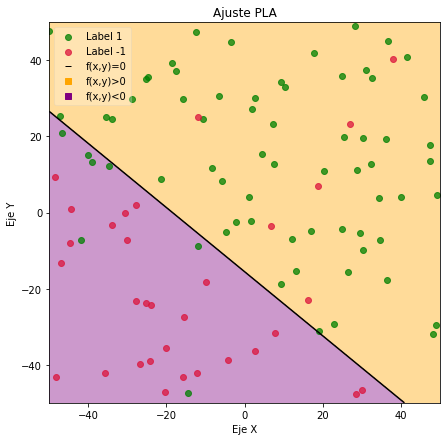

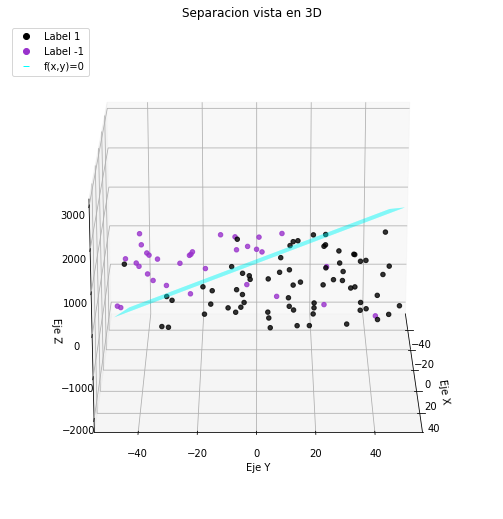

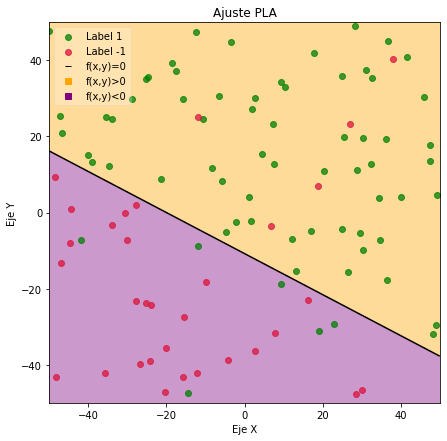

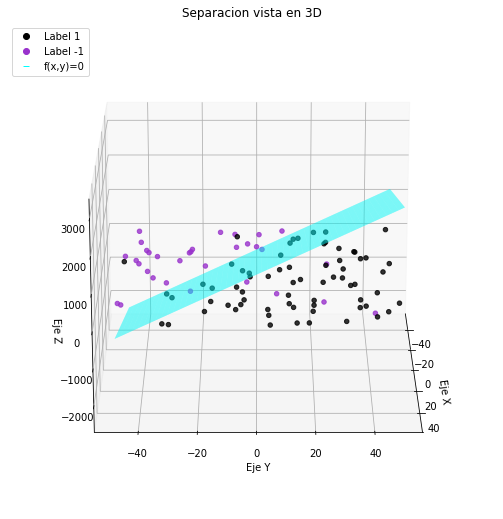

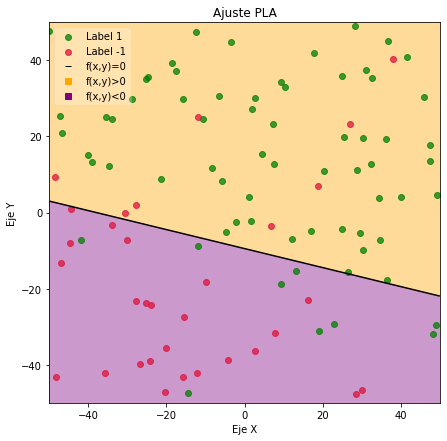

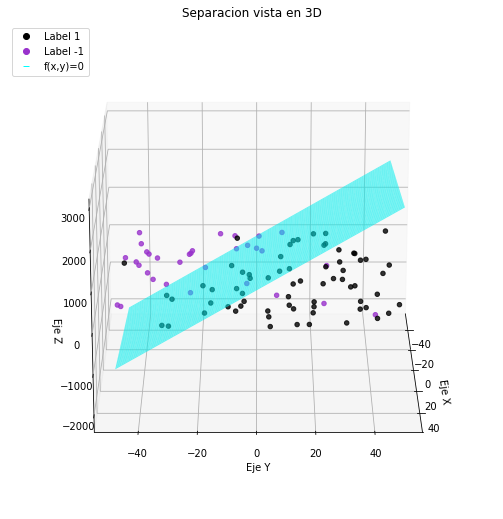

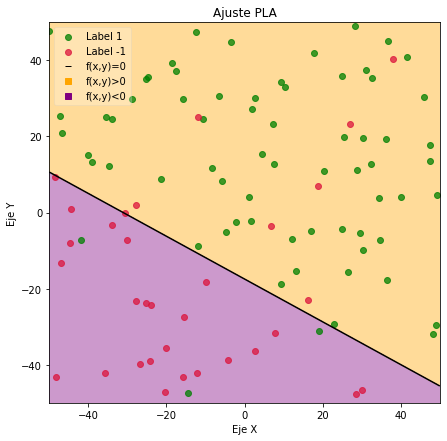

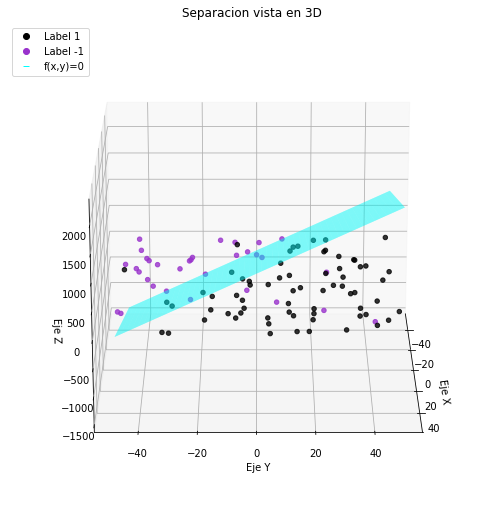

vini  \
0  [0.688845259018665, 0.4911099613042962, 0.0881...   
1  [0.23507763668617032, 0.461602080891622, 0.198...   
2  [0.0254762357788203, 0.7293976982561526, 0.724...   
3  [0.33039174636170277, 0.8434941260636555, 0.42...   
4  [0.8646861447635343, 0.6570654246228895, 0.581...   
5  [0.200727488035091, 0.5295466104783949, 0.8944...   
6  [0.30499397583521604, 0.8709456091610533, 0.90...   
7  [0.32984456268188234, 0.6830743663365642, 0.89...   
8  [0.07569688175830336, 0.8785878632047704, 0.19...   
9  [0.8497689100179306, 0.6671187886992039, 0.344...   

                                                fini    it  error  
0  [366.68884525901865, 6.782864575368819, 35.943...  1000   0.21  
1  [407.2350776366862, 22.01987841542625, 31.1345...  1000   0.12  
2  [411.0254762357788, 10.278015992071527, 43.602...  1000   0.18  
3  [398.33039174636167, 9.864032503454265, 41.026...  1000   0.17  
4  [402.86468614476354, 12.439252703286762, 22.35...  1000   0.12  
5  [394.2007274880351, 15.328991895032548, 25.620...  1000   0.12  
6  [410.3049939758352, 22.25873451926627, 26.4268...  1000   0.13  
7  [389.3298445626819, 19.46619996566186, 36.0980...  1000   0.11  
8  [383.0756968817583, 10.095700980752778, 40.436...  1000   0.17  
9  [406.84976891001793, 13.096947713168966, 23.29...  1000   0.11

In [19]:
# Ajustamos los parámeros del algoritmo
max_iter = 1000
N = 10

# Añadimos una caracterítica más a los datos para poder hacer el producto escalar
datos = np.array([[1,x[0],x[1]] for x in muestra])

buffer = {'vini':[],'fini':[],'it':[],'error':[]}
for i in range(N):
    
    # Inicializamos el vector de pesos con numeros aleatorios entre 0 y 1
    # La dimensión del vector debe de ser 3 (datos.shape --> (100,3))
    vini     = np.random.rand(datos.shape[1])

    # Ejecutamos el PLA
    w, it = ajusta_PLA(datos,labels_noise,max_iter,vini)
    
    # Calculamos el error
    error = error_PLA(datos, labels_noise, f = lambda x,y: w[0] + x*w[1] + y*w[2])
    
    # Guardamos los resultados de la ejecución
    buffer['vini'].append(vini)
    buffer['fini'].append(w)
    buffer['it'].append(it)
    buffer['error'].append(error)
    
    
    # Visualizamos resultados
    plot_labels(datos[:,1:], labels_noise, lambda x,y:w[0] + w[1]*x + w[2]*y, title = 'Ajuste PLA')
    plot_plain_3D(w             = w,
                  f             = None,
                  X             = datos,
                  y             = labels_noise,
                  title         = 'Separacion vista en 3D',
                  axis_labels   = ['Eje X','Eje Y','Eje Z'],
                  legend_labels = ['Label 1','Label -1','f(x,y)=0'],
                  zlim          = [-3,3],
                  view          = [20,0],
                  using_w       = True)
    

df = pd.DataFrame(buffer)
df.round(decimals=5)
#df.to_csv('rest_2b.csv')
df


## Regresión Logística

## Funciones Auxiliares

In [20]:
def f(x,y):
    return y - a*x - b

def sigmoid(z):
    if type(z) != np.ndarray:
        z = np.asarray(z)
    return 1/(1+np.exp(-z))

def Ein(w,x,y):
    return np.mean( np.log( 1 + np.exp( -y * np.dot(w,x.T) ) ) )
    
def grad_Ein(w,x,y):
    return -(1/len(y))*np.sum( ((y*x.T) / (1 + np.exp( ( y * np.dot(w,x.T) ) ) ) ).T,axis=0)
    #return -y*x*sigmoid(-y*np.dot(w,x))
    

                                        
def sgdLR(datos,labels,lr,batch_size,max_epochs,vini=None):
    
    # Inicializamos los pesos a cero con una longitud igual a las 
    # características de la muestra
    if type(vini) == type(None): # Si no indicamos pesos iniciales lo inicializamos a cero
        w = np.zeros(datos.shape[1],dtype=np.float64)
    else: # En caso contrario, usamos los pasados por parametros
        w = vini.copy()

    cambio = True # Determina si se realiza algún cambio significativo 
    epoc   = 0    # Realizamos un conteo de las epocas por donde vamos
    
    # Va usar una ventana deslicante para cambiar de batchs
    ini    = 0 # Inicio de la ventana
    fini   = 0 # Fin de ventana
    
    #Tomamos los indices de los ejemplos
    indices = np.arange(len(labels))
    
    # Mientras haya cambios significativos y no nos pasemos del maximo de epocas
    while cambio and epoc < max_epochs:
        # Empezamos al principio del conjunto de datos
        ini = 0
        # Almacenamos una copia del vector anterior
        w_prev = w.copy()
        # Desordenamos los indices en cada epoca para mayor aleatoriedad
        np.random.shuffle(indices)
        # Calculamos el numero de pasos de ventana que va a hacer en una epoca
        npasos    = int(len(indices)/batch_size)
        
        # En caso de que el tamaño de la ventana no divida al numero de ejemplos, 
        # entrenamos con el resto y por tanto añadimos una iteración mas 
        resto = len(indices)%batch_size
        if resto != 0:
            npasos +=1       
        
        # Iteramos por los datos deslizando la ventana en cada iteracion 
        for i in range(npasos):
            # Fin de la ventana
            fini = ini + batch_size
            # Obtenemos el minilote 
            xb = datos[indices[ini:fini]]
            yb = labels[indices[ini:fini]]
            # Calculamos el gradiente
            grad = grad_Ein(w,xb,yb)
            # Actualizamos pesos
            w = w - lr*grad
            # Actualizamos el minilote
            ini = fini
            # Si el tamaño del minilote no divide al conjunto de datos entrenamos con los datos faltantes
            # Y vamos a empezar la ultima iteración cambiamos el tam del minilote
            if i == npasos-2 and resto!=0:
                batch_size = resto
        # Vemos si ha habido un cambio significativo comprobando que la
        # norma de la diferencia de los pesos anterior y actual supere un umbral
        cambio = (np.linalg.norm(w_prev - w)>0.01)
        # Aumentamos el numero de epocas
        epoc +=1
        
    return w, epoc   

In [21]:
# Declaramos los parámetros para el ejercicio 
N     = 100
d     = 2
rango = [0,2]

# Generamos una muestra aleatoria con los parámetros anteriores
muestra = simula_unif(N,d,rango)
# Generamos una recta aleatoria dentrentro del rango de la muestra
a,b     = simula_recta(rango)
# Etiquetamos la muestras
labels = etiquetar(muestra, f, noise = False)
# Añadimos una característica más a los datos para poder hacer el producto escalar
muestra = np.array([[1,x[0],x[1]] for x in muestra])

print("a = ",a)
print("b = ",b)

a =  -1.1905970532984973
b =  3.150557141205309


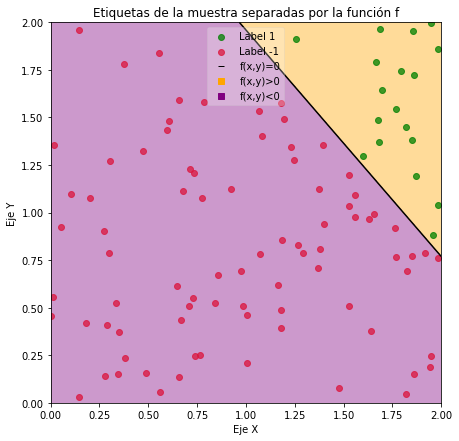

In [22]:
plot_labels(muestra[:,1:],labels,rango=[0,2])

Aplicamos un experimento para probar con distintos valores de lr y tamaños del minilote

Experimento usando SGD con RL



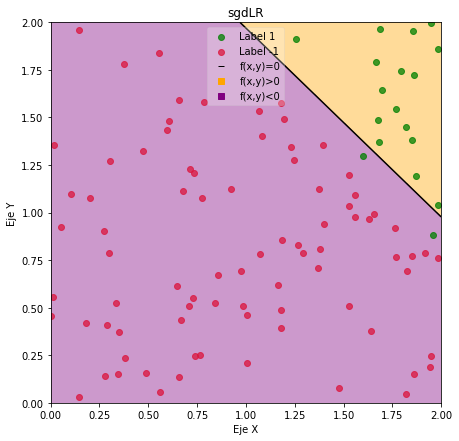

batch_size: 	 1
learnig_rate: 	 0.01 
Error: 	 0.12374309167871804
Epocas: 	 501


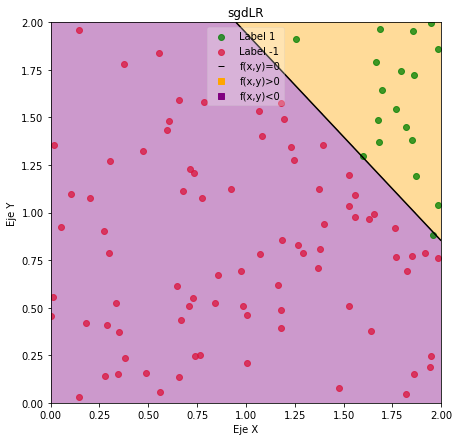

batch_size: 	 1
learnig_rate: 	 0.05 
Error: 	 0.046619937374636156
Epocas: 	 1035


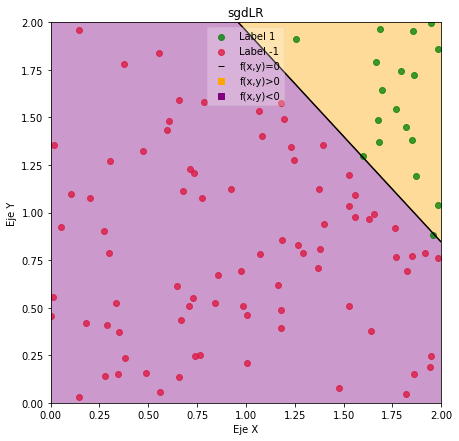

batch_size: 	 1
learnig_rate: 	 0.1 
Error: 	 0.02974528610036191
Epocas: 	 1435


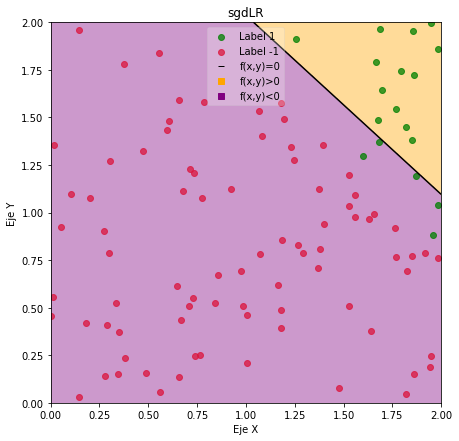

batch_size: 	 2
learnig_rate: 	 0.01 
Error: 	 0.1838138874187044
Epocas: 	 372


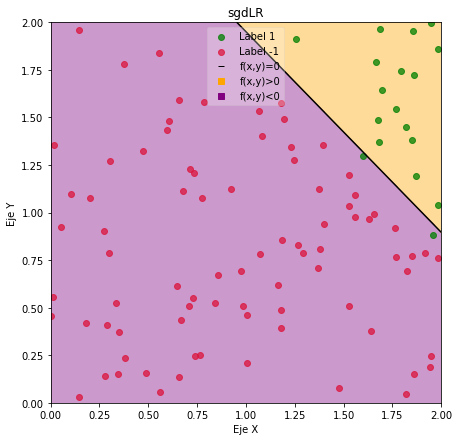

batch_size: 	 2
learnig_rate: 	 0.05 
Error: 	 0.07185344921839618
Epocas: 	 758


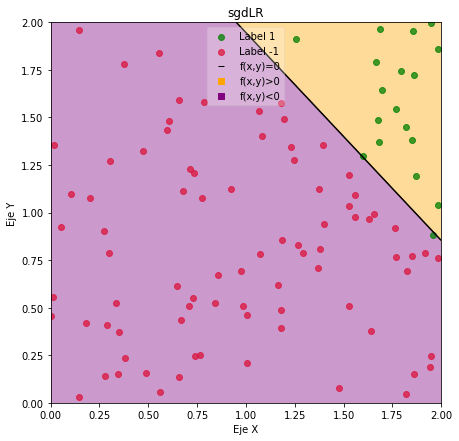

batch_size: 	 2
learnig_rate: 	 0.1 
Error: 	 0.04640258753595019
Epocas: 	 1045


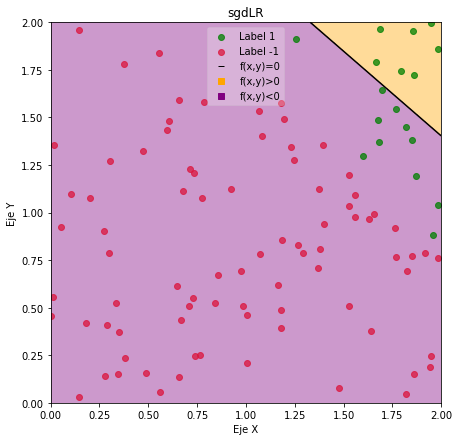

batch_size: 	 4
learnig_rate: 	 0.01 
Error: 	 0.2756236563422254
Epocas: 	 264


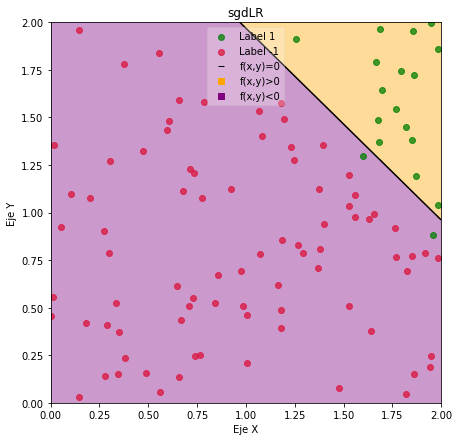

batch_size: 	 4
learnig_rate: 	 0.05 
Error: 	 0.1086539310089162
Epocas: 	 554


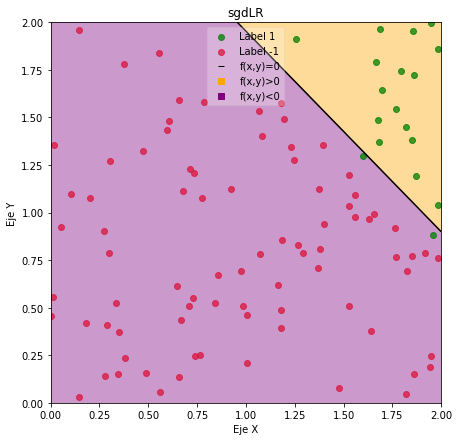

batch_size: 	 4
learnig_rate: 	 0.1 
Error: 	 0.07165246584598
Epocas: 	 763


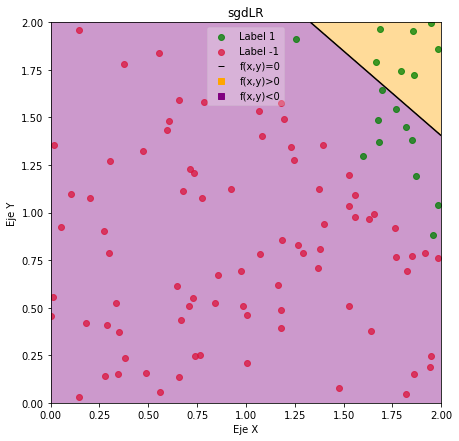

batch_size: 	 8
learnig_rate: 	 0.01 
Error: 	 0.27580850179019506
Epocas: 	 264


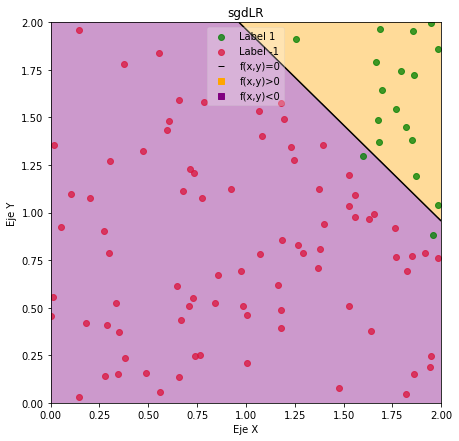

batch_size: 	 8
learnig_rate: 	 0.05 
Error: 	 0.10804709336416668
Epocas: 	 562


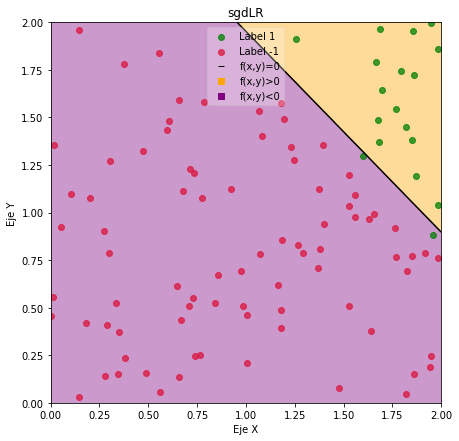

batch_size: 	 8
learnig_rate: 	 0.1 
Error: 	 0.07151421690105159
Epocas: 	 767


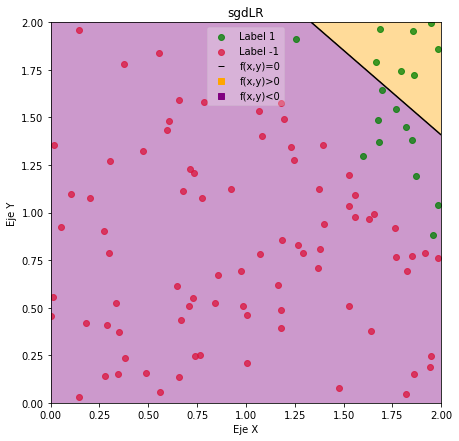

batch_size: 	 16
learnig_rate: 	 0.01 
Error: 	 0.2762953850431467
Epocas: 	 263


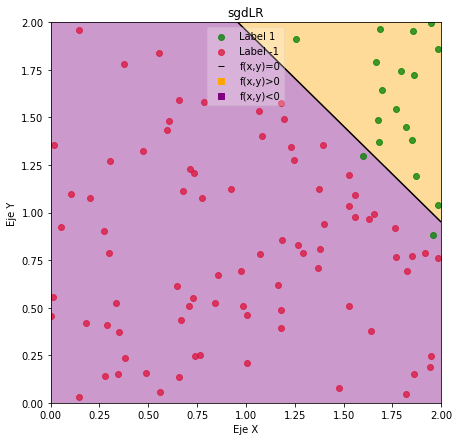

batch_size: 	 16
learnig_rate: 	 0.05 
Error: 	 0.10838255661804824
Epocas: 	 558


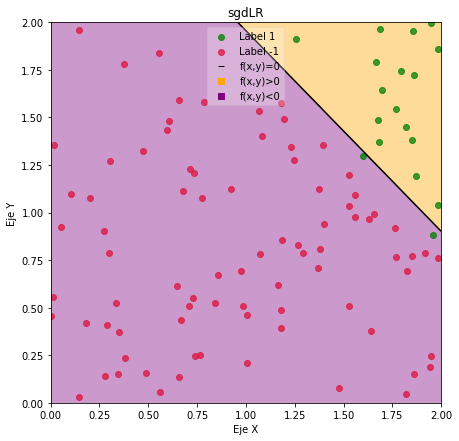

batch_size: 	 16
learnig_rate: 	 0.1 
Error: 	 0.07162216556325494
Epocas: 	 765


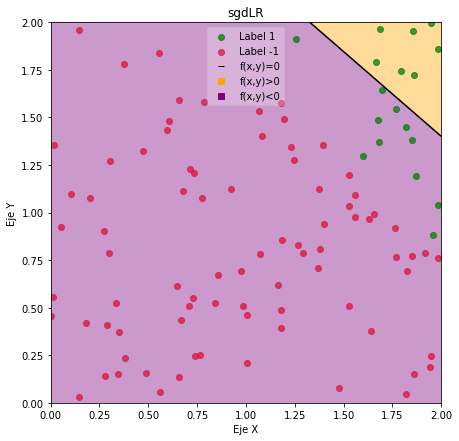

batch_size: 	 32
learnig_rate: 	 0.01 
Error: 	 0.2759505765622329
Epocas: 	 264


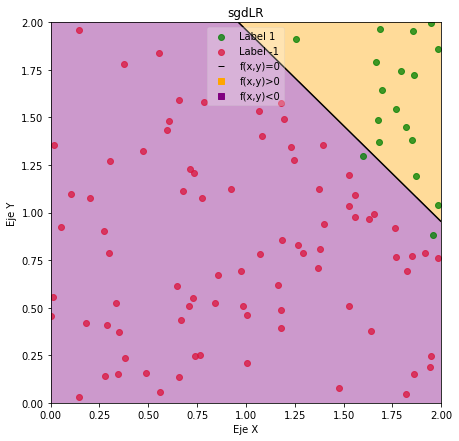

batch_size: 	 32
learnig_rate: 	 0.05 
Error: 	 0.10846784767815666
Epocas: 	 557


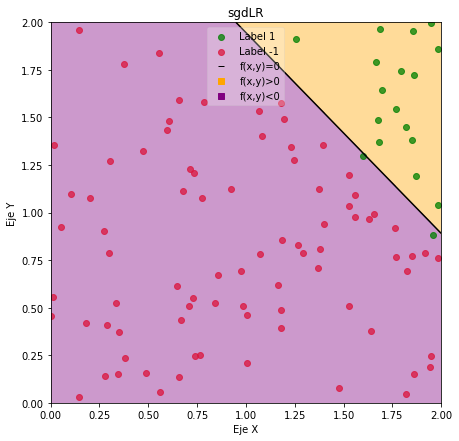

batch_size: 	 32
learnig_rate: 	 0.1 
Error: 	 0.07141363992389758
Epocas: 	 771


In [23]:
# Declaramos parametros
max_epochs = 10000

vlr = [0.01,0.05,0.1]
vbatch = [1,2,4,8,16,32] # Como la muestra es sol de 100 no podemos usar un tamaño muy grande
buffer = {'batch':[],'lr':[],'it':[],'error':[]}

print("Experimento usando SGD con RL\n")
for batch in vbatch:
    for lr in vlr:
        # Ejecutamos el algoritmo
        w, it = sgdLR(muestra,labels,lr,batch,max_epochs)
        
        # Calculamos el error
        error = Ein(w,muestra,labels)
        
        plot_labels(muestra[:,1:], labels, lambda x,y:w[0] + w[1]*x + w[2]*y, rango=[0,2], title = 'sgdLR')
        
        # Añadimos los datos al buffer para luego imprimirlos en un dataframe
        buffer['batch'].append(batch)
        buffer['lr']   .append(lr)
        buffer['error'].append(error)
        buffer['it']   .append(it)
        
        # Visualizamos resultados
        print("==================")
        print(f"batch_size: \t {batch}")
        print(f"learnig_rate: \t {lr} ")
        print(f"Error: \t {error}")
        print(f"Epocas: \t {it}")

In [24]:
df = pd.DataFrame(buffer)
#df.to_csv('result_RL_SGD.csv')
df

batch    lr    it     error
0       1  0.01   501  0.123743
1       1  0.05  1035  0.046620
2       1  0.10  1435  0.029745
3       2  0.01   372  0.183814
4       2  0.05   758  0.071853
5       2  0.10  1045  0.046403
6       4  0.01   264  0.275624
7       4  0.05   554  0.108654
8       4  0.10   763  0.071652
9       8  0.01   264  0.275809
10      8  0.05   562  0.108047
11      8  0.10   767  0.071514
12     16  0.01   263  0.276295
13     16  0.05   558  0.108383
14     16  0.10   765  0.071622
15     32  0.01   264  0.275951
16     32  0.05   557  0.108468
17     32  0.10   771  0.071414

Ahora seleccionamos los parámetros en función de los resultados experimentales y aplicamos RL a una nueva muestra de tamaño 1000.

In [25]:
# Nos creamosun conjunto de test de 2000puntos
N     = 2000
d     = 2
rango = [0,2]

# Generamos una muestra aleatoria con los parámetros anteriores
test = simula_unif(N,d,rango)
# Etiquetamos la muestras con la función que usamos para etiquetar en test
test_labels = etiquetar(test, f, noise = False)
# Añadimos una característica más a los datos para poder hacer el producto escalar
test = np.array([[1,x[0],x[1]] for x in test])

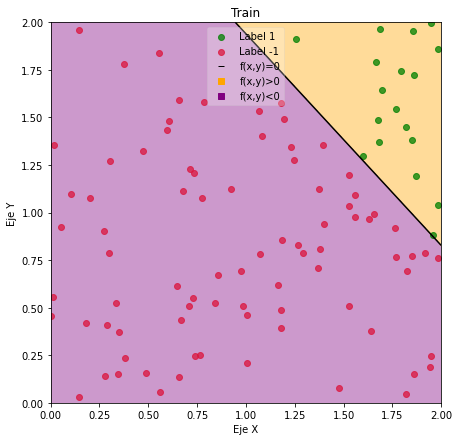

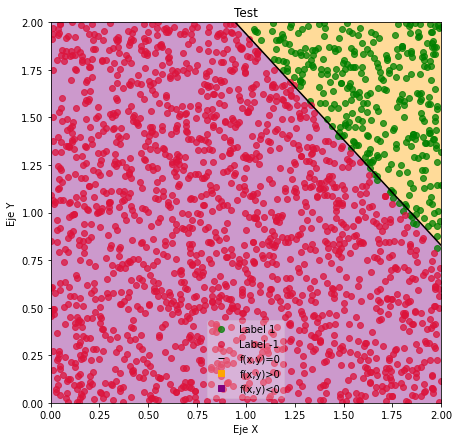

Parametros
----------
Batch size:  1
lr:  0.1
Epocas:  1415
Ein:  0.029638357257431466
Eout:  0.04180990798916068


In [26]:
# Declaramos los parametros que hemos considerado tras el procedimiento experimetnal
max_epochs = 5000
batch      = 1
lr         = 0.1

# Ejecutamos el algoritmo para calcular los pesos
w, it = sgdLR(muestra,labels,lr,batch,max_epochs)
        
# Calculamos el error
error_in  = Ein(w,muestra,labels)
error_out = Ein(w,test,test_labels)
plot_labels(muestra[:,1:], labels, lambda x,y:w[0] + w[1]*x + w[2]*y,rango=[0,2], title = 'Train')
plot_labels(test[:,1:], test_labels, lambda x,y:w[0] + w[1]*x + w[2]*y,rango=[0,2], title = 'Test')
print("Parametros")
print("----------")
print("Batch size: ",batch)
print("lr: ",lr)
print("Epocas: ",it)

print("Ein: ",error_in)
print("Eout: ",error_out)

Ahora repetimos el experimento cien veces y calculamos la media

In [27]:
max_epochs  = 5000
batch       = 1
lr          = 0.1 

media_in     = 0
media_out    = 0
media_epochs = 0

for i in range(100):
    
    # TRAIN
    muestra = simula_unif(100,2,[0,2])
    a,b     = simula_recta(rango)
    labels  = etiquetar(muestra, f, noise = False)
    muestra = np.array([[1,x[0],x[1]] for x in muestra])
    
    # Entrenamos
    w, it = sgdLR(muestra,labels,lr,batch,max_epochs)
    
    # TEST
    test        = simula_unif(2000,2,[0,2])
    test_labels = etiquetar(test, f, noise = False)
    test        = np.array([[1,x[0],x[1]] for x in test])
    
    #Evaluamos
    media_in     += Ein(w,muestra,labels)
    media_out    += Ein(w,test,test_labels)
    media_epochs += it

media_in     /= 100
media_out    /= 100
media_epochs /= 100

print("Media Ein: ",media_in)
print("Media Eout: ",media_out)
print("Media Epochs: ",media_epochs)

Media Ein:  0.029773212515965444
Media Eout:  0.040549520038285616
Media Epochs:  1196.01


# Bonus

In [28]:
# Funcion para leer los datos
def readData(file_x, file_y, digits, labels):
    # Leemos los ficheros	
    datax = np.load(file_x)
    datay = np.load(file_y)
    y = []
    x = []
    # Solo guardamos los datos cuya clase sea la digits[0] o la digits[1]
    for i in range(0,datay.size):
        if datay[i] == digits[0] or datay[i] == digits[1]:
            if datay[i] == digits[0]:
                y.append(labels[0])
            else:
                y.append(labels[1])
            x.append(np.array([1, datax[i][0], datax[i][1]]))

    x = np.array(x, np.float64)
    y = np.array(y, np.float64)
    
    return x, y




def pseudoinverse(x,y):
    """
    Calculo de los pesos a traves de operaciones algebraicas y usando la descomposición en valores singulares de X
    
    Params
    ----------
       - x: matrix nxm
            n es el número de ejemplos 
            m son las características
       - y: array 1D
            Etiquetas
        
    Return
    ----------
        -w: array 1D
            pesos tras regresión
    """
    # Descomponemos X en sus valores singulares, notamos que V ya está traspuesta
    U, D, V = np.linalg.svd(x,full_matrices=False)
    # D es un vector y lo invertimos
    Dinv = 1/D
    # Calculamos la pseudoinversa
    inv = V.T @ np.diag(Dinv) @ np.diag(Dinv) @ V  
    # Finalmente multiplicamos de nuevo por X.T y por y para obtener los pesos
    pseu = np.dot(inv,x.T)
    w    = np.dot(pseu,y)
    
    return w


def Err(x,y,w):
    """
    Calcula el error respecto a la variable w
    """
    # np.linalg.norm calcula la norma y np.dot el producto entre vectores y matrices
    err = (np.linalg.norm(np.dot(x,w) - y)**2)/len(x)
    return err

Leemos los datos

In [29]:
directorio = 'datos/'
x,y = readData(directorio+'X_train.npy',directorio+'y_train.npy',[4,8],[-1,1])
x_test,y_test = readData(directorio+'X_test.npy',directorio+'y_test.npy',[4,8],[-1,1])

In [30]:
print("x_train.shape =",x.shape)
print("x_test .shape =",x_test.shape)

x_train.shape = (1194, 3)
x_test .shape = (366, 3)


Mostramos usando el código del profesorado los datos

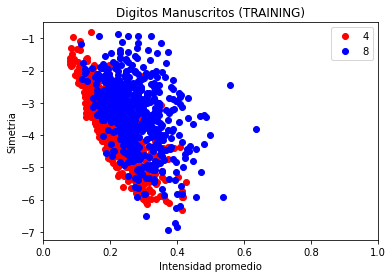

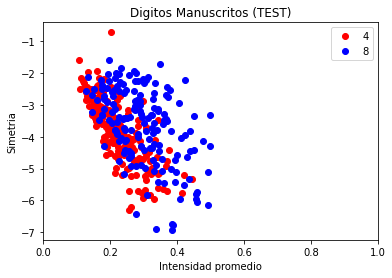

In [31]:
fig, ax = plt.subplots()
ax.plot(np.squeeze(x[np.where(y == -1),1]), np.squeeze(x[np.where(y == -1),2]), 'o', color='red', label='4')
ax.plot(np.squeeze(x[np.where(y == 1),1]), np.squeeze(x[np.where(y == 1),2]), 'o', color='blue', label='8')
ax.set(xlabel='Intensidad promedio', ylabel='Simetria', title='Digitos Manuscritos (TRAINING)')
ax.set_xlim((0, 1))
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(np.squeeze(x_test[np.where(y_test == -1),1]), np.squeeze(x_test[np.where(y_test == -1),2]), 'o', color='red', label='4')
ax.plot(np.squeeze(x_test[np.where(y_test == 1),1]), np.squeeze(x_test[np.where(y_test == 1),2]), 'o', color='blue', label='8')
ax.set(xlabel='Intensidad promedio', ylabel='Simetria', title='Digitos Manuscritos (TEST)')
ax.set_xlim((0, 1))
plt.legend()
plt.show()

## RL - Pseudoinversa

Calculamos la solución que nos da la regresion lineal aplicando el método de la pseudoinvesa, que sabemos que es la óptima

Pesos:  [-0.50676351  8.25119739  0.44464113]
Función de error cuadratica
Error dentro de la meustra:  0.6428532963367777
Error en los datos de test:  0.7087148141159981
Porcentage de error: 
Train:        0.22780569514237856
Test:         0.25136612021857924


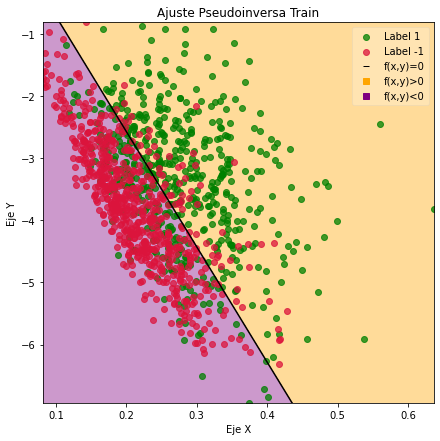

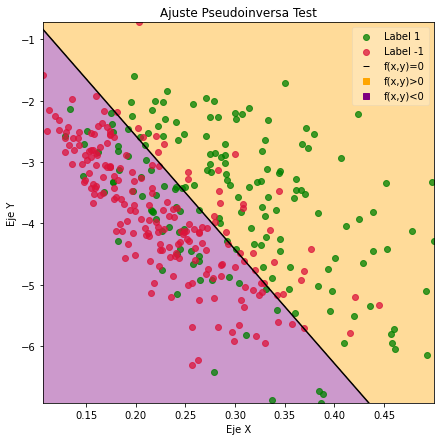

In [32]:
w = pseudoinverse(x,y)

print("Pesos: ", w)
print("==================================")
print("Función de error cuadratica")
print('Error dentro de la meustra: ',Err(x,y,w))
print('Error en los datos de test: ',Err(x_test,y_test,w))
print("==================================")
print("Porcentage de error: ")
print("Train:       ",precision(x[:,1:],y,lambda t,s: w[0] + w[1]*t + w[2]*s))
print("Test:        ",precision(x_test[:,1:],y_test,lambda t,s: w[0] + w[1]*t + w[2]*s))

 

plot_labels(x[:,1:],y,lambda x,y: w[0] + w[1]*x + w[2]*y,title='Ajuste Pseudoinversa Train',lim=True)
plot_labels(x_test[:,1:],y_test,lambda x,y: w[0] + w[1]*x + w[2]*y,title='Ajuste Pseudoinversa Test',lim=True)

## PLA

Aplicamos ahora el algorimto de PLA, como la muestra no es separable le ponemos un número máximo de 5000 iteraciones.


Pesos:  [-10.         169.74822392  10.0459375 ]
Función de error PLA:
Error dentro de la meustra:  0.2319932998324958
Error en los datos de test:  0.24863387978142076
Porcentage de error: 
Train:        0.2319932998324958
Test:         0.24863387978142076


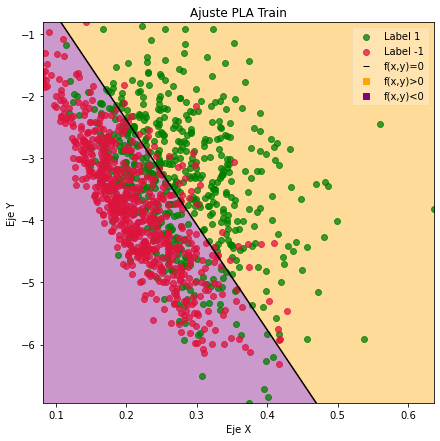

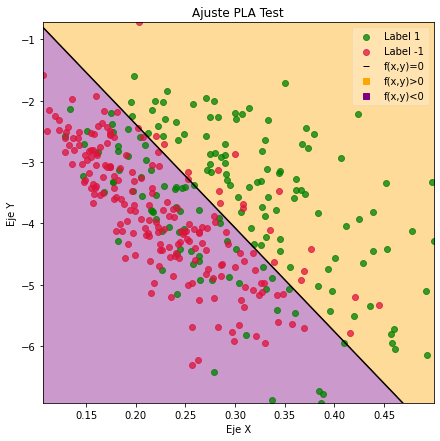

In [33]:
w, it = ajusta_PLA(x,y,max_iter=5000,vini=np.array([0,0,0]))

print("Pesos: ", w)
print("==================================")
print("Función de error PLA:")
print('Error dentro de la meustra: ',error_PLA(x,y,lambda t,s: w[0] + w[1]*t + w[2]*s))
print('Error en los datos de test: ',error_PLA(x_test,y_test,lambda t,s: w[0] + w[1]*t + w[2]*s))
print("==================================")
print("Porcentage de error: ")
print("Train:       ",precision(x[:,1:],y,lambda t,s: w[0] + w[1]*t + w[2]*s))
print("Test:        ",precision(x_test[:,1:],y_test,lambda t,s: w[0] + w[1]*t + w[2]*s))


plot_labels(x[:,1:],y,lambda x,y: w[0] + w[1]*x + w[2]*y,title='Ajuste PLA Train',lim=True)
plot_labels(x_test[:,1:],y_test,lambda x,y: w[0] + w[1]*x + w[2]*y,title='Ajuste PLA Test',lim=True)

Usamos PLA con los pesos de la pseudoinversa

Pesos:  [-10.50676351 172.65257029  12.25682863]
Función de error PLA:
Error dentro de la meustra:  0.29564489112227804
Error en los datos de test:  0.2978142076502732
Porcentage de error: 
Train:        0.29564489112227804
Test:         0.2978142076502732


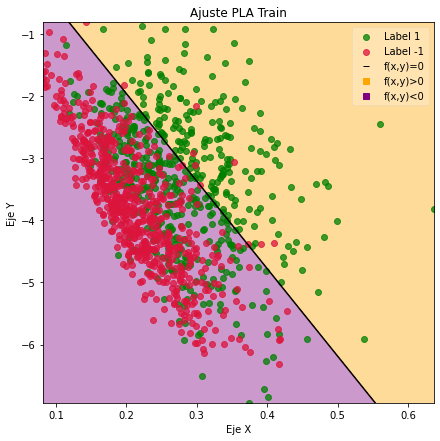

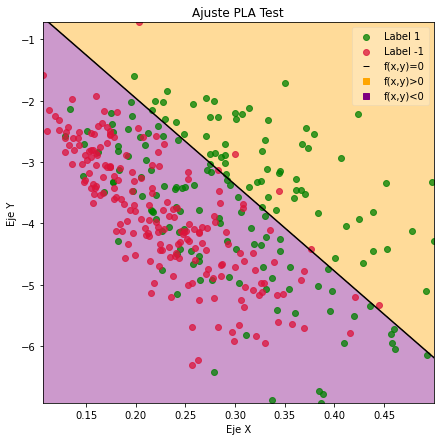

In [34]:
w = pseudoinverse(x,y)

w, it = ajusta_PLA(x,y,max_iter=5000,vini=w)

print("Pesos: ", w)
print("==================================")
print("Función de error PLA:")
print('Error dentro de la meustra: ',error_PLA(x,y,lambda t,s: w[0] + w[1]*t + w[2]*s))
print('Error en los datos de test: ',error_PLA(x_test,y_test,lambda t,s: w[0] + w[1]*t + w[2]*s))
print("==================================")
print("Porcentage de error: ")
print("Train:       ",precision(x[:,1:],y,lambda t,s: w[0] + w[1]*t + w[2]*s))
print("Test:        ",precision(x_test[:,1:],y_test,lambda t,s: w[0] + w[1]*t + w[2]*s))


plot_labels(x[:,1:],y,lambda x,y: w[0] + w[1]*x + w[2]*y,title='Ajuste PLA Train',lim=True)
plot_labels(x_test[:,1:],y_test,lambda x,y: w[0] + w[1]*x + w[2]*y,title='Ajuste PLA Test',lim=True)

## PLA Pocket

Aplicamos ahora el algoritmo de PLA Pocket

In [35]:
def pla_pocket(datos,labels,max_iter,vini):
    """
    Implementación de PLA_Pocket
    
    Params:
    ----------
        - datos: np.ndarray
            Matriz con los datos, las filas son ejemplos y las columanas características
        - labels: np.ndarray
            Vector de etiquetas
        - max_iter: int
            Numero de epocas que realiza el algoritmo
        - vini: np.ndarray
            Pesos de inicialización 
    
    Return:
    ----------
        - winner: dictionary
            Dicionario conteniendo los pesos y el error que produce
    """
    
    # Vector con pesos iniciales
    w      = vini
    
    # Diccionario con los mejores pesos hasta el momento
    winner = {'w'    :w,
              'error':error_PLA(datos,labels,lambda x,y: w[0]+w[1]*x+w[2]*y),
              'epoc': 0}
        
    # Iteramos tantas epocas como indique el argumento
    for i in range(max_iter):
        # En cada epoca iteramos sobre todo el conjunto de datos
        for x,y in zip(datos,labels):
            # Si la clasificación no corresponde con la etiqueta correcta
            if signo(np.dot(w,x))!=y:
                # Actualizamos pesos
                w = w + y*x
                
        # Tras acabar una época, calculamos el error
        current_error = error_PLA(datos,labels,lambda x,y:w[0]+w[1]*x+w[2]*y)
    
        # Si este error es mejor que el que tenemos guardado
        if current_error < winner['error']:
            # Actualizamos los pesos ganadores
            winner['w']     = w
            winner['error'] = current_error
            winner['epoc']  = i
            
    return winner
        
    

Pesos:  [ -8.         138.57245022   8.095     ]
Epoca en la que obtenemos los pesos:  26
Función de error PLA
Error dentro de la meustra:  0.228643216080402
Error en los datos de test:  0.2459016393442623
Porcentage de error: 
Train:        0.228643216080402
Test:         0.2459016393442623


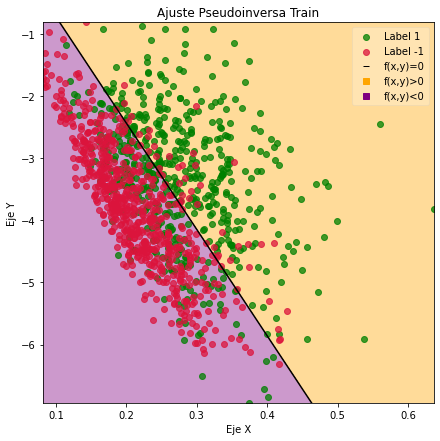

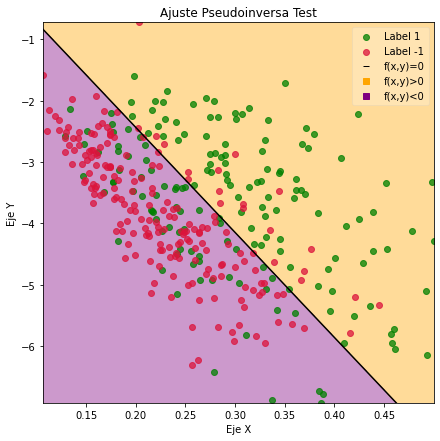

In [36]:
vini    = np.zeros(3)
dic     = pla_pocket(x,y,max_iter=5000,vini=vini)
w       = dic['w']
error   = dic['error']
epoc    = dic['epoc']

print("==================================")
print("Pesos: ", w)
print("Epoca en la que obtenemos los pesos: ", epoc)
print("==================================")
print("Función de error PLA")
print('Error dentro de la meustra: ',error_PLA(x,y,lambda t,s: w[0] + w[1]*t + w[2]*s))
print('Error en los datos de test: ',error_PLA(x_test,y_test,lambda t,s: w[0] + w[1]*t + w[2]*s))
print("==================================")
print("Porcentage de error: ")
print("Train:       ",precision(x[:,1:],y,lambda t,s: w[0] + w[1]*t + w[2]*s))
print("Test:        ",precision(x_test[:,1:],y_test,lambda t,s: w[0] + w[1]*t + w[2]*s))


plot_labels(x[:,1:],y,lambda x,y: w[0]+w[1]*x+w[2]*y,title='Ajuste Pseudoinversa Train',lim=True)
plot_labels(x_test[:,1:],y_test,lambda x,y: w[0]+w[1]*x+w[2]*y,title='Ajuste Pseudoinversa Test',lim=True)

PLA Pcoket con los pesos de la pseudoinversa

Pesos:  [-6.50676351 94.33278003  4.88432863]
Epoca en la que obtenemos los pesos:  10
Función de error PLA
Error dentro de la meustra:  0.22529313232830822
Error en los datos de test:  0.2540983606557377
Porcentage de error: 
Train:        0.22529313232830822
Test:         0.2540983606557377


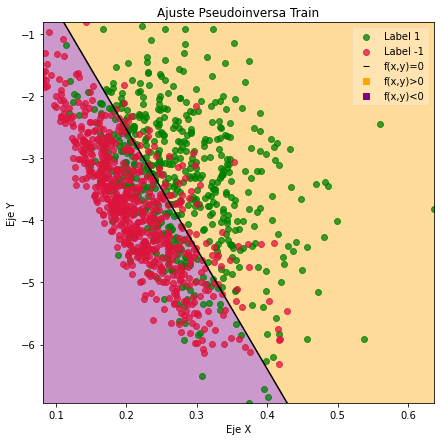

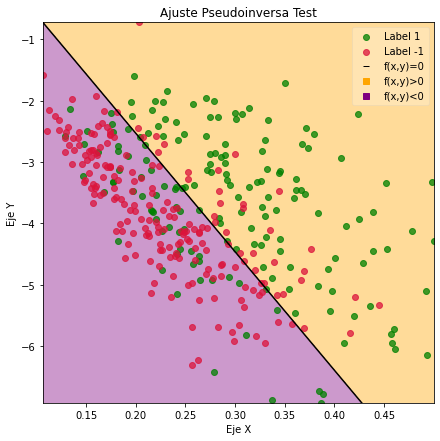

In [37]:
vini = pseudoinverse(x,y)


dic     = pla_pocket(x,y,max_iter=5000,vini=vini)
w       = dic['w']
error   = dic['error']
epoc    = dic['epoc']

print("==================================")
print("Pesos: ", w)
print("Epoca en la que obtenemos los pesos: ", epoc)
print("==================================")
print("Función de error PLA")
print('Error dentro de la meustra: ',error_PLA(x,y,lambda t,s: w[0] + w[1]*t + w[2]*s))
print('Error en los datos de test: ',error_PLA(x_test,y_test,lambda t,s: w[0] + w[1]*t + w[2]*s))
print("==================================")
print("Porcentage de error: ")
print("Train:       ",precision(x[:,1:],y,lambda t,s: w[0] + w[1]*t + w[2]*s))
print("Test:        ",precision(x_test[:,1:],y_test,lambda t,s: w[0] + w[1]*t + w[2]*s))


plot_labels(x[:,1:],y,lambda x,y: w[0]+w[1]*x+w[2]*y,title='Ajuste Pseudoinversa Train',lim=True)
plot_labels(x_test[:,1:],y_test,lambda x,y: w[0]+w[1]*x+w[2]*y,title='Ajuste Pseudoinversa Test',lim=True)

## RL

Aplicamos ahora regresión logística.  
__ojo:__ usamoe el error de regresión logistica (el del logaritmo)  
__Tiempo de espera:__ 5 minutos en un ordenador bueno, en uno más flojo, a lo mejor 10

In [38]:
# Declaramos parámetros
vlr         = [0.1,0.01,0.05]
vbatch_size = [1,2,4,8,16]
max_epochs  = 1000

buffer = {'batch':[],'lr':[],'w':[],'error':[]}

for lr in vlr:
    for batch in vbatch_size:
        w, it = sgdLR(x,y,lr,batch,max_epochs)
        error = Ein(w,x,y)

        buffer['batch'].append(batch)
        buffer['lr']   .append(lr   )
        buffer['error'].append(error)
        buffer['w']    .append(w    )
        
        
df = pd.DataFrame(buffer)
#df.to_csv('bonus_RL.csv')
df

batch    lr                                                  w     error
0       1  0.10  [-1.7556032309561767, 34.2127744345954, 1.7815...  0.468101
1       2  0.10  [-1.6145764886978509, 31.289584302236186, 1.80...  0.482093
2       4  0.10  [-1.6531710372692279, 31.17655193209806, 1.754...  0.473338
3       8  0.10  [-1.5729020637514193, 30.18496743302067, 1.756...  0.483376
4      16  0.10  [-1.5958943789333844, 31.31166392954257, 1.884...  0.503929
5       1  0.01  [-1.2869272999019523, 26.303035502465548, 1.39...  0.466548
6       2  0.01  [-1.1324753851150564, 23.80625136386475, 1.343...  0.467039
7       4  0.01  [-1.1328763573422103, 23.76000352164218, 1.334...  0.466854
8       8  0.01  [-1.1269387141920955, 23.855177841348425, 1.31...  0.466584
9      16  0.01  [-1.142524206983788, 24.026323725233368, 1.314...  0.466645
10      1  0.05  [-1.6010533528542978, 31.14020487804252, 1.739...  0.468889
11      2  0.05  [-1.5214621241775856, 29.653088771194202, 1.60...  0.463129
12      4  0.05  [-1.4894739236924637, 29.265657896478515, 1.52...  0.466111
13      8  0.05  [-1.521521197761494, 29.001378455524495, 1.618...  0.467529
14     16  0.05  [-1.4841326227548448, 29.069073903256637, 1.50...  0.467352

Nos quedamos con los mejores parámetros de las pruebas anteriores

Parámetros:
Pesos:  [-1.5215212  29.00137846  1.61873721]
Lr:  0.05
Batch Size:  8
Error: 
Ein:  0.4675289992670053
Etet:  0.5317110465990106
Porcentage de error:
Train:  0.2169179229480737
Test:  0.2459016393442623


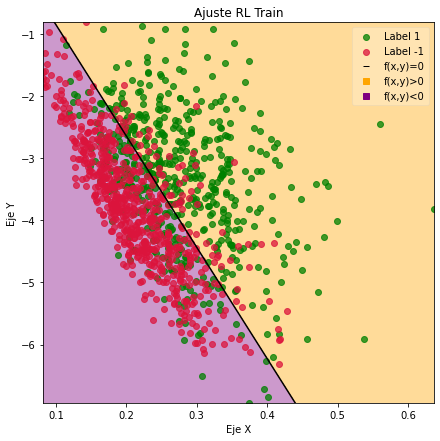

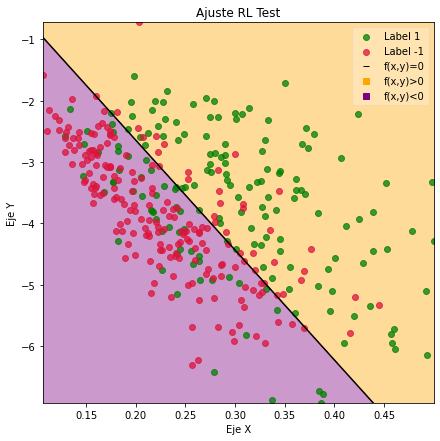

In [39]:
# Nos quedamos con aquel que tiene menor error 
mejor = 13

batch = df.loc[mejor][0]
lr    = df.loc[mejor][1]
w     = df.loc[mejor][2]
error = df.loc[mejor][3]

error_test = Ein(w,x_test,y_test)

print("==================================")
print("Parámetros:")
print("Pesos: ", w)
print("Lr: ",lr)
print("Batch Size: ",batch)

print("==================================")
print("Error: ")
print("Ein: ",error)
print("Etet: ",error_test)

print("==================================")
print("Porcentage de error:")
print('Train: ',precision(x[:,1:],y,lambda x,y: w[0] + w[1]*x + w[2]*y))
print('Test: ',precision(x_test[:,1:],y_test,lambda x,y: w[0] + w[1]*x + w[2]*y))

plot_labels(x[:,1:],y,lambda x,y: w[0] + w[1]*x + w[2]*y,title='Ajuste RL Train',lim=True)
plot_labels(x_test[:,1:],y_test,lambda x,y: w[0] + w[1]*x + w[2]*y,title='Ajuste RL Test',lim=True)

Vamos a aplicar los pesos obtenido en Regresión lineal (usando pseudoinversa) como pesos de inicialización para PLR, Rregresión logística y PLA-pocket y veamos que ocurre

Pesos:  [-0.50676351  8.25119739  0.44464113]
Error: 
Ein:  0.5571035891838683
Etest:  0.5726239967704722
Porcentage de error:
Train:  0.22780569514237856
Test:  0.25136612021857924


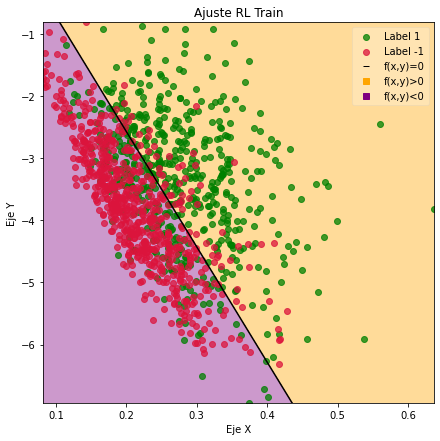

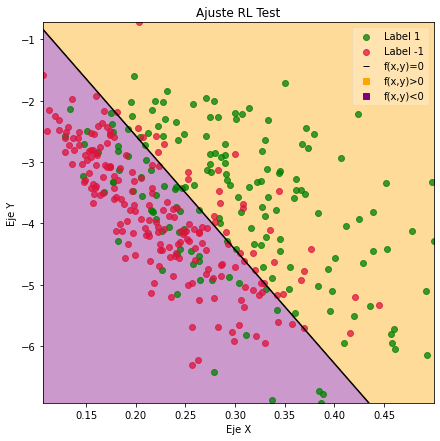

In [40]:
w = pseudoinverse(x,y)

sgdLR(x,y,lr,batch,max_epochs,vini=w)

print("Pesos: ",w)
print("==================================")
print("Error: ")
print("Ein: ",Ein(w,x,y))
print("Etest: ",Ein(w,x_test,y_test))

print("==================================")
print("Porcentage de error:")
print('Train: ',precision(x[:,1:],y,lambda x,y: w[0] + w[1]*x + w[2]*y))
print('Test: ',precision(x_test[:,1:],y_test,lambda x,y: w[0] + w[1]*x + w[2]*y))


plot_labels(x[:,1:],y,lambda x,y: w[0] + w[1]*x + w[2]*y,title='Ajuste RL Train',lim=True)
plot_labels(x_test[:,1:],y_test,lambda x,y: w[0] + w[1]*x + w[2]*y,title='Ajuste RL Test',lim=True)